In [ ]:
from google.colab import files
import pandas as pd
uploaded1=files.upload()

Saving sibur_transactions_dataset.csv to sibur_transactions_dataset (2).csv


In [ ]:
df=pd.read_csv(next(iter(uploaded1)))
display(df.head())
print(df.dtypes)
print(df.shape)

,transaction_id,client_id,order_date,product_category,volume_tons,order_value_rub,payment_method,payment_delay_days,sales_channel,client_type,region,contract_size_category,year,month,quarter,day_of_week,is_churned,total_orders,total_value,avg_order_value
0,TXN1000000,CL11069,2022-03-07,Сжиженные газы,296.13,11544008.21,Оплата по факту,0,Дистрибьютор,Агрохолдинг,Москва,B,2022,3,1,0,0,72,1.746371e+09,2.425516e+07
1,TXN1000001,CL11435,2024-07-21,Полипропилен,24.35,2325458.45,Оплата по факту,0,Прямые продажи,Производитель упаковки,Приволжский,D,2024,7,3,6,0,78,2.150577e+08,2.757149e+06
2,TXN1000002,CL11074,2024-09-16,Полиэтилен,97.98,9893136.11,Отсрочка 60 дней,0,Онлайн-платформа,Производитель медицинских изделий,Санкт-Петербург,C,2024,9,3,0,0,75,5.806618e+08,7.742158e+06
3,TXN1000003,CL11438,2024-02-25,Полиэтилен,60.42,4359952.73,Предоплата,0,Долгосрочный контракт,Автопроизводитель,Башкортостан,C,2024,2,1,6,0,73,5.065963e+08,6.939676e+06
4,TXN1000004,CL10688,2024-07-19,МТБЭ,1527.14,90280701.71,Отсрочка 30 дней,0,Прямые продажи,Нефтегазовая компания,Татарстан,A,2024,7,3,4,0,71,4.305930e+09,6.064691e+07


transaction_id             object
client_id                  object
order_date                 object
product_category           object
volume_tons               float64
order_value_rub           float64
payment_method             object
payment_delay_days          int64
sales_channel              object
client_type                object
region                     object
contract_size_category     object
year                        int64
month                       int64
quarter                     int64
day_of_week                 int64
is_churned                  int64
total_orders                int64
total_value               float64
avg_order_value           float64
dtype: object
(98000, 20)


In [ ]:
df_cleaned = df.copy() #копия дф для преобразований

In [ ]:
df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'], format='%Y-%m-%d', errors='coerce')

# преобразование customer_id в string
df_cleaned['client_id'] = df_cleaned['client_id'].astype('string')

# преобразование категориальных столбцов
categorical_columns = ['region', 'product_category', 'payment_method', 'sales_channel', 'contract_size_category']
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype('category')

print(df_cleaned.info)
print(df_cleaned.dtypes)

<bound method DataFrame.info of       transaction_id client_id order_date      product_category  volume_tons  \
0         TXN1000000   CL11069 2022-03-07        Сжиженные газы       296.13   
1         TXN1000001   CL11435 2024-07-21          Полипропилен        24.35   
2         TXN1000002   CL11074 2024-09-16            Полиэтилен        97.98   
3         TXN1000003   CL11438 2024-02-25            Полиэтилен        60.42   
4         TXN1000004   CL10688 2024-07-19                  МТБЭ      1527.14   
...              ...       ...        ...                   ...          ...   
97995     TXN1097995   CL10674 2023-12-10                  ПЭТФ       210.13   
97996     TXN1097996   CL11266 2023-08-15  Каучук синтетический       189.46   
97997     TXN1097997   CL11292 2024-10-13        Сжиженные газы       520.29   
97998     TXN1097998   CL11418 2024-12-05                  МТБЭ       134.39   
97999     TXN1097999   CL10659 2022-12-27          Полипропилен        25.04   

       

In [ ]:
display(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          98000 non-null  object        
 1   client_id               98000 non-null  string        
 2   order_date              98000 non-null  datetime64[ns]
 3   product_category        98000 non-null  category      
 4   volume_tons             98000 non-null  float64       
 5   order_value_rub         98000 non-null  float64       
 6   payment_method          98000 non-null  category      
 7   payment_delay_days      98000 non-null  int64         
 8   sales_channel           98000 non-null  category      
 9   client_type             98000 non-null  object        
 10  region                  98000 non-null  category      
 11  contract_size_category  98000 non-null  category      
 12  year                    98000 non-null  int64 

None

In [ ]:
df['order_date'].unique()[:10]

array(['2022-03-07', '2024-07-21', '2024-09-16', '2024-02-25',
       '2024-07-19', '2022-09-28', '2024-07-11', '2023-12-18',
       '2023-05-01', '2023-08-28'], dtype=object)

In [ ]:
df['order_date'].isna().mean(), df_cleaned['order_date'].isna().mean()

(np.float64(0.0), np.float64(0.0))

# **Анализ категориальных признаков**

In [ ]:
categorical_columns = ['region', 'product_category', 'payment_method', 'sales_channel', 'contract_size_category']

for col in categorical_columns:
    print(f"{col}: {df_cleaned[col].nunique()} значений - {sorted(df_cleaned[col].unique())}")

region: 11 значений - ['Башкортостан', 'Дальневосточный', 'Москва', 'Приволжский', 'Санкт-Петербург', 'Северо-Западный', 'Сибирский', 'Татарстан', 'Уральский', 'Центральный', 'Южный']
product_category: 11 значений - ['Бензол', 'Каучук синтетический', 'МТБЭ', 'ПВХ', 'ПЭТФ', 'Полипропилен', 'Полистирол', 'Полиэтилен', 'Пропилен', 'Сжиженные газы', 'Этилен']
payment_method: 5 значений - ['Аккредитив', 'Оплата по факту', 'Отсрочка 30 дней', 'Отсрочка 60 дней', 'Предоплата']
sales_channel: 4 значений - ['Дистрибьютор', 'Долгосрочный контракт', 'Онлайн-платформа', 'Прямые продажи']
contract_size_category: 4 значений - ['A', 'B', 'C', 'D']


# **Анализ числовых признаков:**

Выделите числовые столбцы.

Постройте boxplots и гистограммы для выявления выбросов и аномалий.

Примите решение и обработайте выбросы: либо удалите их (аргументировав), либо замените на медиану/среднее. Например, отрицательное количество товаров — это аномалия.

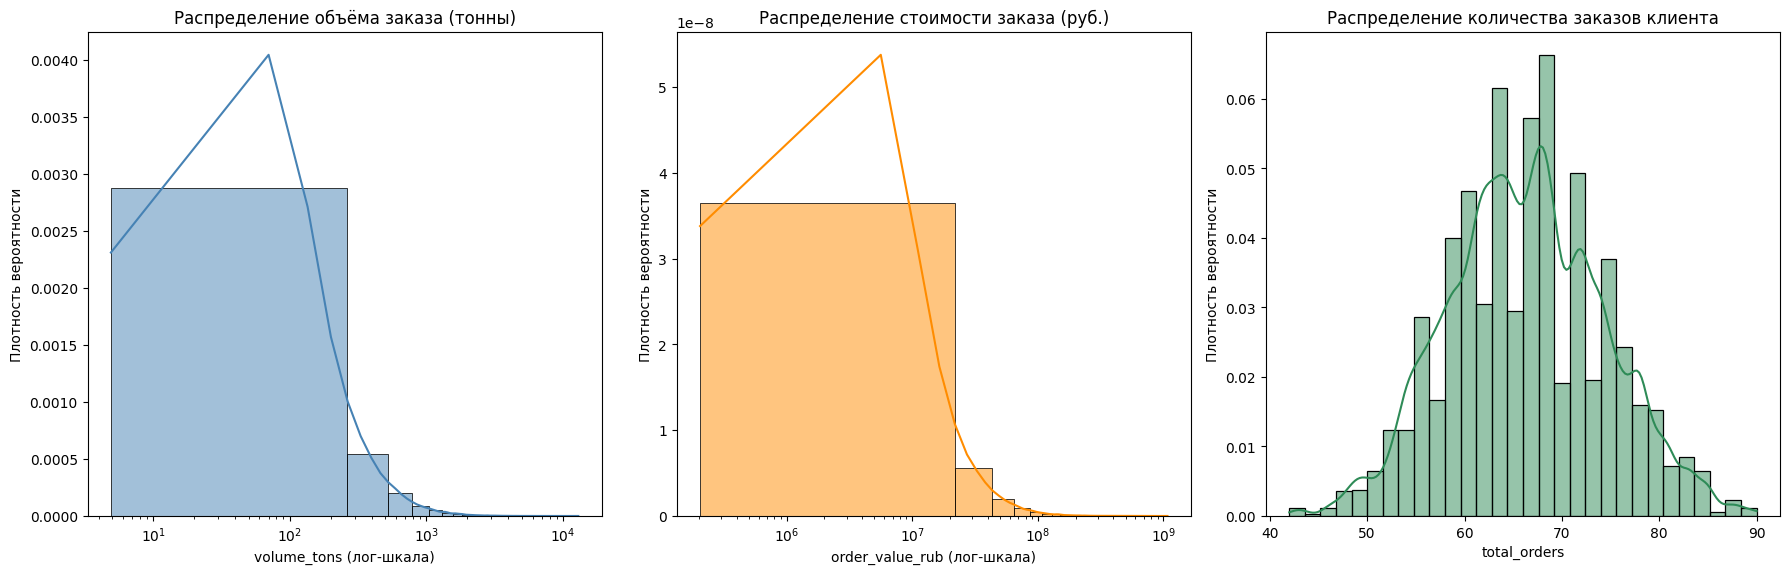

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(18, 6))

# 1. Объём заказа (volume_tons)
plt.subplot(1, 3, 1)
sns.histplot(
    df_cleaned['volume_tons'],
    bins=50,
    kde=True,
    stat='density',
    color='steelblue'
)
plt.xscale('log')
plt.title('Распределение объёма заказа (тонны)')
plt.xlabel('volume_tons (лог-шкала)')
plt.ylabel('Плотность вероятности')

# 2. Стоимость заказа (order_value_rub)
plt.subplot(1, 3, 2)
sns.histplot(
    df_cleaned['order_value_rub'],
    bins=50,
    kde=True,
    stat='density',
    color='darkorange'
)
plt.xscale('log')
plt.title('Распределение стоимости заказа (руб.)')
plt.xlabel('order_value_rub (лог-шкала)')
plt.ylabel('Плотность вероятности')

# 3. Количество заказов клиента (total_orders)
plt.subplot(1, 3, 3)
sns.histplot(
    df_cleaned['total_orders'],
    bins=30,
    kde=True,
    stat='density',
    color='seagreen'
)
plt.title('Распределение количества заказов клиента')
plt.xlabel('total_orders')
plt.ylabel('Плотность вероятности')

plt.tight_layout()
plt.show()



---



*логарифмическая шкала обязательна для volume_tons и order_value_rub, тк без неё распределение было бы «сплющено».*



---



1. Объём заказа (volume_tons)

Распределение объёма заказа характеризуется выраженной правосторонней асимметрией. Основная масса наблюдений сосредоточена в диапазоне до 200–300 тонн, при этом максимальные значения превышают 10 000 тонн, что более чем в 40 раз выше медианного уровня. Наличие длинного правого хвоста указывает на существование устойчивой группы клиентов с крупнотоннажными поставками, а не на единичные аномалии данных.

2. Стоимость заказа (order_value_rub)

Распределение стоимости заказа также имеет ярко выраженную асимметрию. Большинство транзакций располагается в диапазоне до 20–30 млн руб., тогда как максимальные значения превышают 1 млрд руб., что более чем в 50 раз выше медианы. Оценка плотности вероятности показывает плавное убывание распределения, подтверждая, что крупные заказы формируют непрерывную часть выборки и отражают концентрацию выручки у ограниченного числа клиентов.

3. Количество заказов клиента (total_orders)

В отличие от финансовых показателей, распределение количества заказов клиента является более устойчивым и близким к симметричному. Основная часть значений сосредоточена в диапазоне 55–75 заказов, при общем разбросе от 42 до 90 заказов. Данный признак характеризуется значительно меньшей вариативностью и может рассматриваться как стабильная поведенческая характеристика клиентов.

**Общий вывод**

Анализ распределений показал, что показатели объёма и стоимости заказов обладают высокой вариативностью и экстремальной асимметрией, обусловленной деятельностью крупных корпоративных клиентов, тогда как частота заказов отличается относительной однородностью. Экстремальные значения превышают медианные уровни в 40–50 раз, что подтверждает структурную неоднородность клиентской базы. Полученные результаты обосновывают необходимость сегментации клиентов и применения робастных статистических методов при дальнейшем анализе.

In [ ]:
numeric_columns = ['volume_tons', 'order_value_rub', 'total_orders']

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

stats_before = df[numeric_columns].describe()
print(stats_before)

        volume_tons  order_value_rub  total_orders
count  98000.000000     9.800000e+04  98000.000000
mean     247.238358     1.781662e+07     66.308041
std      414.011055     3.199696e+07      7.973495
min        4.910000     2.046299e+05     42.000000
25%       55.550000     3.664918e+06     61.000000
50%      118.530000     8.071527e+06     66.000000
75%      267.440000     1.866137e+07     72.000000
max    12979.180000     1.078752e+09     90.000000


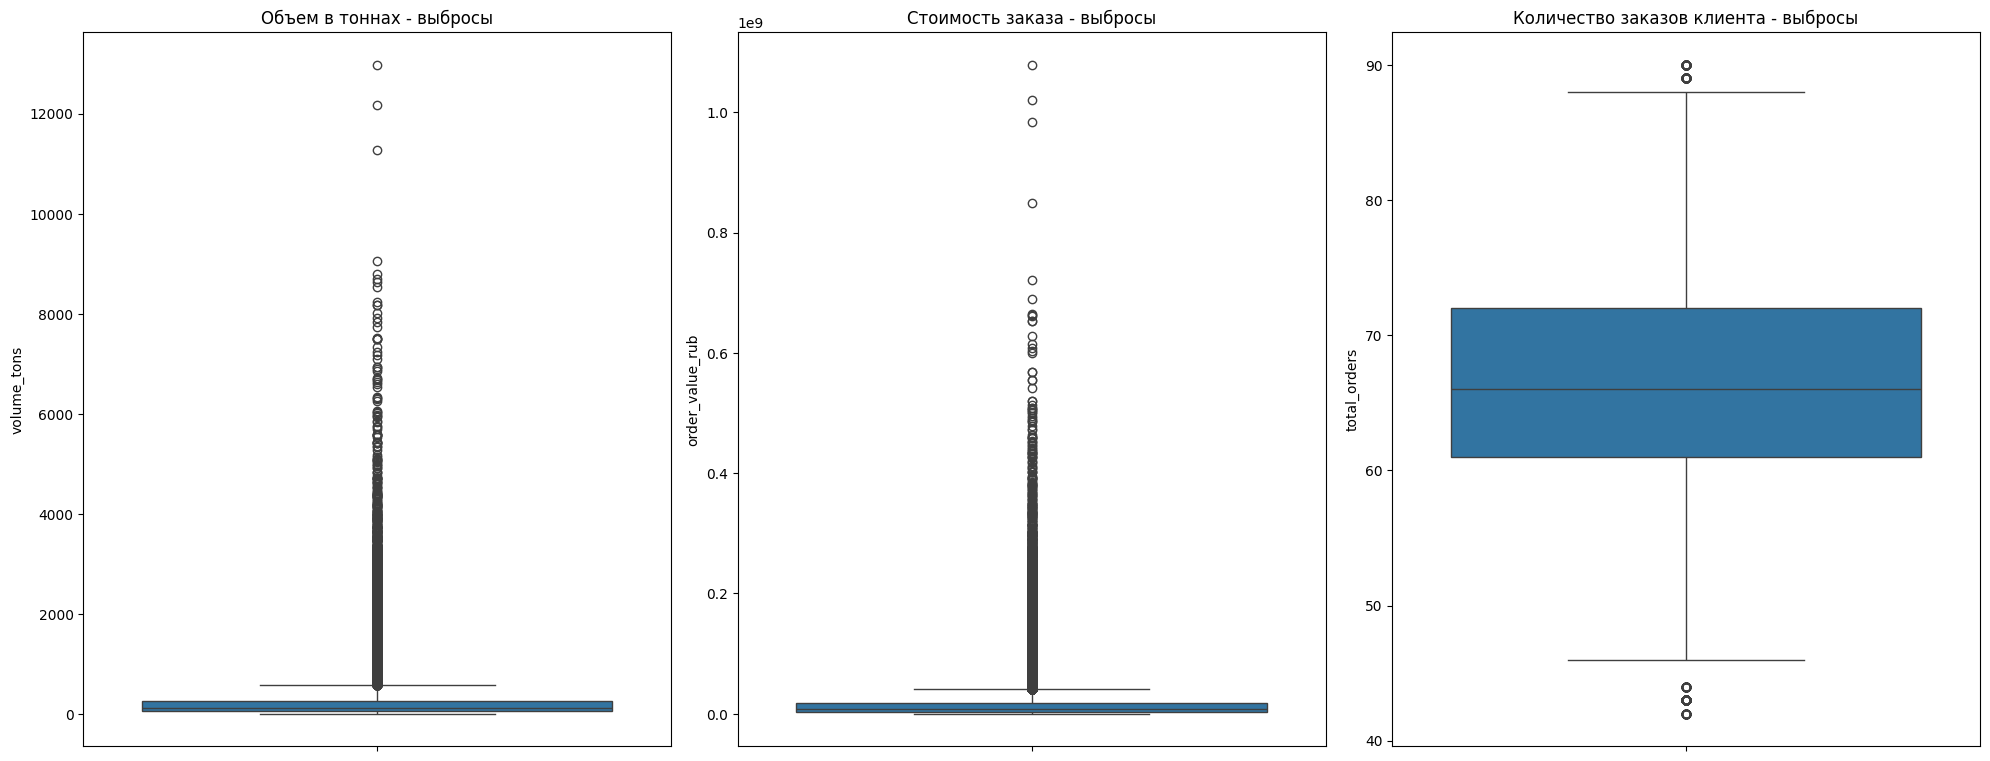

In [ ]:
# "Ящик с усами" для более наглядного отображения возможных аномалий/выбросов
plt.figure(figsize=(20, 15))

# Графики для возраста
plt.subplot(2, 3, 1)
sns.boxplot(y=df['volume_tons'])
plt.title('Объем в тоннах - выбросы')

# Графики для количества
plt.subplot(2, 3, 2)
sns.boxplot(y=df['order_value_rub'])
plt.title('Стоимость заказа - выбросы')

# Графики для цены
plt.subplot(2, 3, 3)
sns.boxplot(y=df['total_orders'])
plt.title('Количество заказов клиента - выбросы')

plt.tight_layout()
plt.show()

0.2 × 1e9 = 200 000 000 руб.

0.4 = 400 000 000 руб. и тп

**ВЫВОД ПО АНАЛИЗУ ВЫБРОСОВ СОВОКУПНОЙ ГРУППЫ КЛИЕНТОВ(ДО РАЗДЕЛЕНИЯ НА КРУПНЫХ И ОБЩИХ)**

1. Критическая концентрация бизнеса

20% крупнейших заказов генерируют 80% выручки. Наблюдается экстремальная правосторонняя асимметрия: максимальные значения превышают средние в 52 раза по объему и в 61 раз по стоимости. Это указывает на высокую зависимость СИБУР от ограниченного числа мега-контрактов.

2. Две категории выбросов

Ложные выбросы (0,5-1%): Экстремальные значения (заказы >12 тыс. тонн или >1 млрд рублей) требуют верификации - возможны ошибки ввода данных.

Истинные выбросы (5-10%): Крупные промышленные клиенты с заказами >585 тонн или >41 млн рублей. Это не аномалии, а ключевые партнеры, требующие особого управления.

3. Риски и возможности

Риски: Уязвимость к потере 2-3 крупнейших клиентов может привести к падению выручки на 15-20%.
Возможности: Средние клиенты (55-267 тонн) демонстрируют стабильное поведение и потенциал для роста.



Признак **total_orders** распределён более равномерно, однако его вариация указывает на различия в долгосрочной активности клиентов, что может быть использовано в сегментации аудитории для персонализации маркетинговых воздействий.

Анализ распределений числовых признаков и их влияния на подготовку данных

Визуализация распределений ключевых количественных признаков с помощью boxplot-графиков позволила детализировать ранее полученные статистические оценки и выявить структурные особенности данных, важные для построения корректных маркетинговых моделей и A/B-экспериментов.

1. Объём заказа (volume_tons)

Графическое распределение демонстрирует крайне выраженную правостороннюю асимметрию. Основная масса наблюдений сосредоточена в диапазоне до 300–400 тонн, тогда как на графике отчётливо выделяются многочисленные точки, относящиеся к заказам крупного тоннажа (от 2000 до 12 000 тонн).

*Эти значения не являются единичными статистическими выбросами — напротив, они формируют отдельную устойчивую группу крупных закупок, характерную для высокообъёмных промышленных клиентов.*

**Данная группа оказывает существенное влияние на параметры распределения:**

1.1. медиана (118,53 т) и квартильные значения значительно ниже среднего (247,23 т),

1.2. стандартное отклонение сопоставимо с типичной величиной заказа и многократно превышает IQR,

1.3. визуальная "полка" точек над верхним усом boxplot указывает на кластер крупных заказчиков, а не на случайные аномалии.

2. Стоимость заказа (order_value_rub)

Картина полностью аналогична предыдущему признаку, но выражена ещё сильнее. Большинство операций совершаются в диапазоне до 20–30 млн руб., в то время как значительное количество наблюдений находится в области от 200 млн до более чем 1 млрд руб.

**Эти значения формируют ярко выраженный “длинный хвост”, который:**

2.1. радикально смещает среднее значение (17,8 млн руб.) вверх относительно медианы (8,07 млн руб.),

2.2. увеличивает дисперсию распределения (std ≈ 32 млн руб.),

2.3. создаёт высокие концентрации выбросов на визуализации, что подтверждает неоднородность клиентской базы.

**Данные особенности делают классические средние показатели неустойчивыми; использование медианных метрик или логарифмического преобразования становится оправданным при построении моделей.**

3. Общее количество заказов клиента (total_orders)

В отличие от объёма и стоимости, показатель количества заказов существенно более стабилен:

3.1. разброс составляет 42–90 заказов на клиента,

3.2. график показывает сравнительно узкое межквартильное пространство,

3.3. небольшое количество выбросов фиксируется в нижней части распределения, что может отражать клиентов с нерегулярной закупочной активностью.

**Таким образом, данный признак можно считать робастным, и его влияние на агрегированные показатели заметно ниже, чем у двух предыдущих признаков.**

**ИТОГОВЫЙ ВЫВОД:** Данные содержат значимое количество «крупных» транзакций, формирующих отдельную категорию клиентов, а не являющихся статистическими ошибками.


Необходимость сегментации клиентов для исключения эффекта крупных выбросов

Анализ boxplot-графиков показывает, что присутствующие «выбросы» на самом деле являются не шумом, а отражают структурные различия в поведении двух групп клиентов:

 - крупные корпоративные заказчики (крупные холдинги, нефтегазовые компании, производственные концерны),

 - клиенты со средними и малыми объёмами закупок.

**Первая группа генерирует непропорционально большой вклад в выручку и объём продаж, что приводит к статистическому перекосу и снижению интерпретируемости классических аналитических методов. В маркетинговой аналитике такие значения не следует исключать — их необходимо выделять в отдельный сегмент.**

Сегментация позволит:

- избежать искажения результатов A/B-экспериментов из-за высокой вариативности крупных заказов;

- корректно оценивать влияние маркетинговых кампаний на ключевые метрики (выручку, LTV, retention);

- получать устойчивые выборки с более однородным распределением признаков;

- разрабатывать независимые маркетинговые стратегии для крупных клиентов и для массового сегмента.


**КАК СЛЕДСТВИЕ, Я РАЗДЕЛЮ ДАТАСЕТ НА ДВЕ ГРУППЫ (КРУПНЫЕ КЛИЕНТЫ И ОБЩАЯ ГРУППА КЛИЕНТОВ) ДЛЯ БОЛЕЕ ДЕТАЛЬНОГО АНАЛИЗА И ЗНАЧИМЫХ РЕКОМЕНДАЦИЙ**

# Проверка датасета на нулевые или отрицательные значения

In [ ]:
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

(df_cleaned[numeric_cols] <= 0).sum()

,0
volume_tons,0
order_value_rub,0
payment_delay_days,94853
year,0
month,0
quarter,0
day_of_week,14167
is_churned,98000
total_orders,0
total_value,0


payment_delay_days — 94 853 значений ≤ 0

Это почти весь датасет (98 000 строк).

Что это значит?

В большинстве записей задержка платежа = 0 дней.

Это НОРМАЛЬНО для B2B:
– «Оплата по факту»
– «Предоплата»

Обе модели дают payment_delay_days = 0.

Отрицательных значений нет → проблем нет.

В ходе проверки качества числовых данных была проведена оценка наличия нулевых и отрицательных значений по всем количественным признакам. Ключевые бизнес-метрики — объём заказа (volume_tons) и стоимость заказа (order_value_rub) — не содержат нулевых и отрицательных значений, что подтверждает корректность исходной выгрузки и отсутствие транзакций, противоречащих экономической природе данных.

Наличие нулевых значений в переменной payment_delay_days отражает реальные особенности условий поставок: большая доля клиентов осуществляет оплату без отсрочки, что приводит к частым значениям задержки платежа, равным нулю. Аналогично, нулевые значения day_of_week соответствуют кодировке дней недели, где 0 обозначает понедельник.

Переменная is_churned принимает значение 0 для всех наблюдений, что означает отсутствие клиентов, прекративших сотрудничество в пределах рассматриваемой выборки.

Таким образом, выявленные нулевые значения не являются ошибками данных и соответствуют бизнес-логике работы компании.

# Отображение "ящика с усами" после разделения на две группы клиентов (крупные и общие)

In [ ]:
df = df_cleaned.copy()

# IQR для трёх признаков
numeric_cols = ['volume_tons', 'order_value_rub', 'total_orders']
iqr_info = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    iqr_info[col] = {'upper_bound': upper}

upper_volume = iqr_info['volume_tons']['upper_bound']
upper_value  = iqr_info['order_value_rub']['upper_bound']
upper_orders = iqr_info['total_orders']['upper_bound']

# Формирование двух групп
mask_big = (
    (df['volume_tons'] > upper_volume) |
    (df['order_value_rub'] > upper_value) |
    (df['total_orders'] > upper_orders)
)
df_big = df[mask_big].copy()
df_main = df[~mask_big].copy()
print("Размер df_big:", df_big.shape)
print("Размер df_main:", df_main.shape)

Размер df_big: (11776, 20)
Размер df_main: (86224, 20)


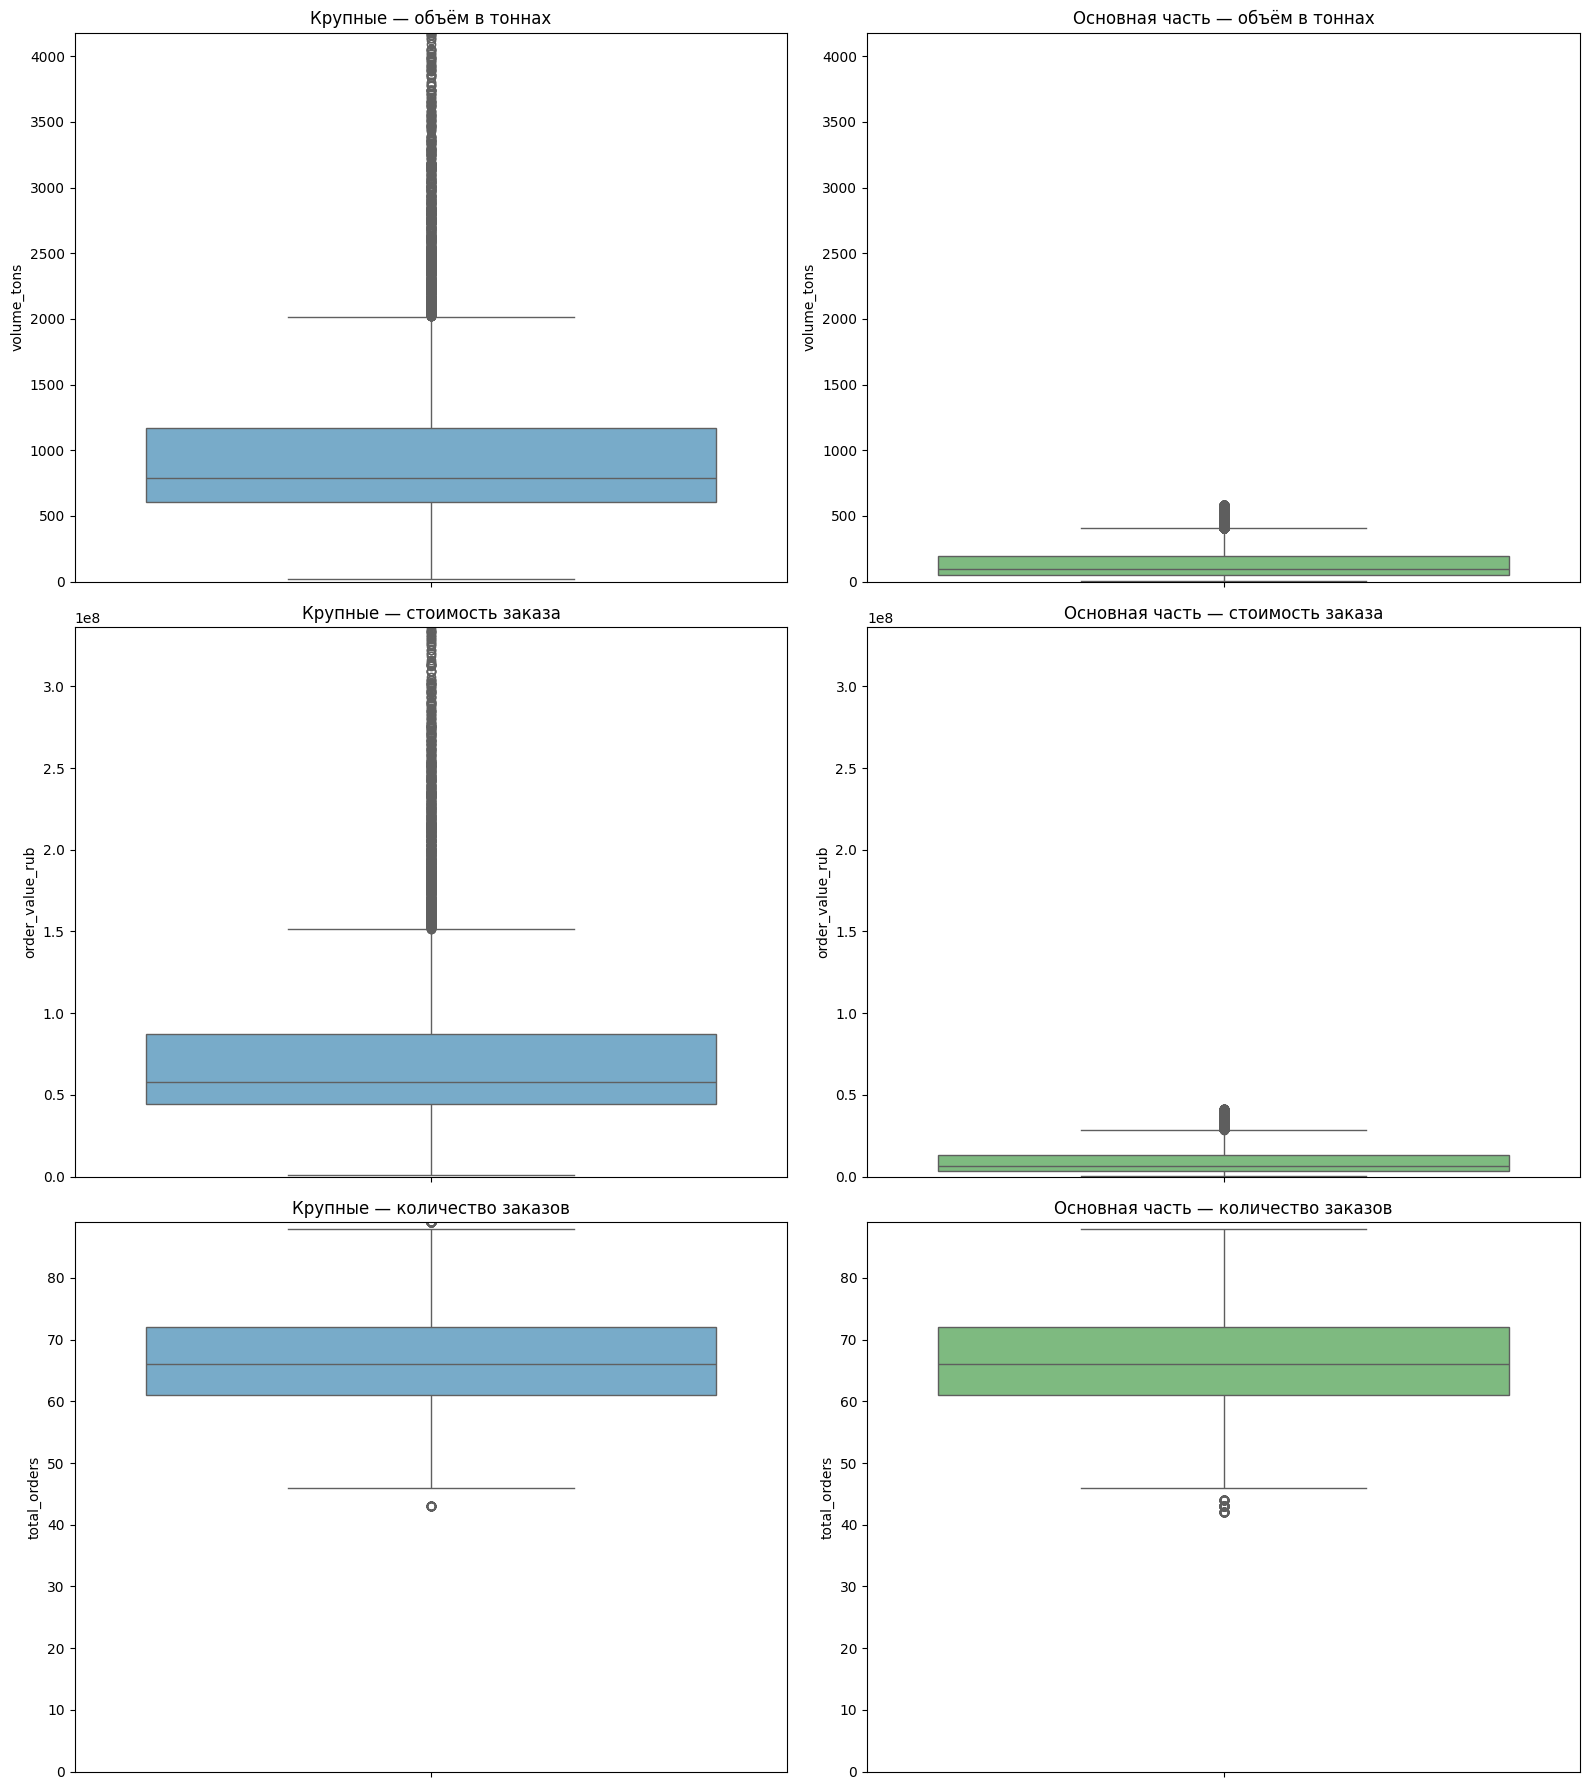

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Построение 6 boxplots в одной ячейке (3 строки × 2 столбца)
# Робастные верхние границы (99-й перцентиль)
y_limits = {
    'volume_tons': (
        0,
        max(
            df_big['volume_tons'].quantile(0.99),
            df_main['volume_tons'].quantile(0.99)
        )
    ),
    'order_value_rub': (
        0,
        max(
            df_big['order_value_rub'].quantile(0.99),
            df_main['order_value_rub'].quantile(0.99)
        )
    ),
    'total_orders': (
        0,
        max(
            df_big['total_orders'].quantile(0.99),
            df_main['total_orders'].quantile(0.99)
        )
    )
}

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# ========= ОБЪЁМ =========
sns.boxplot(y=df_big['volume_tons'], ax=axes[0, 0], color="#6BAED6")
axes[0, 0].set_title("Крупные — объём в тоннах")
axes[0, 0].set_ylim(y_limits['volume_tons'])

sns.boxplot(y=df_main['volume_tons'], ax=axes[0, 1], color="#74C476")
axes[0, 1].set_title("Основная часть — объём в тоннах")
axes[0, 1].set_ylim(y_limits['volume_tons'])

# ========= СТОИМОСТЬ =========
sns.boxplot(y=df_big['order_value_rub'], ax=axes[1, 0], color="#6BAED6")
axes[1, 0].set_title("Крупные — стоимость заказа")
axes[1, 0].set_ylim(y_limits['order_value_rub'])

sns.boxplot(y=df_main['order_value_rub'], ax=axes[1, 1], color="#74C476")
axes[1, 1].set_title("Основная часть — стоимость заказа")
axes[1, 1].set_ylim(y_limits['order_value_rub'])

# ========= КОЛИЧЕСТВО =========
sns.boxplot(y=df_big['total_orders'], ax=axes[2, 0], color="#6BAED6")
axes[2, 0].set_title("Крупные — количество заказов")
axes[2, 0].set_ylim(y_limits['total_orders'])

sns.boxplot(y=df_main['total_orders'], ax=axes[2, 1], color="#74C476")
axes[2, 1].set_title("Основная часть — количество заказов")
axes[2, 1].set_ylim(y_limits['total_orders'])

plt.tight_layout()
plt.show()


Для повышения интерпретируемости boxplot-визуализаций при сохранении единой шкалы по оси Y верхняя граница оси была ограничена 99-м перцентилем распределения соответствующего показателя. При этом ось начиналась с нулевого значения, а экстремальные наблюдения не исключались из анализа, что позволило корректно отразить различия между сегментами без искажения масштаба из-за единичных сверхкрупных значений.

**Анализ boxplot по объёму заказа (volume_tons)**

Наблюдения:

- У крупных клиентов медианный объём заказа находится примерно в диапазоне 700–900 тонн, IQR широкий.

- У основной части клиентов медиана значительно ниже — порядка 100–150 тонн, IQR узкий.

Даже при ограничении оси 99-м перцентилем различие масштабов сохраняется.

**Вывод:**
Объём заказа является ключевым фактором сегментации. Крупные клиенты систематически заказывают в 5–7 раз больше, чем основная масса. При этом распределение у крупных клиентов остаётся сильно асимметричным, что указывает на наличие внутри сегмента подгрупп сверхкрупных заказчиков.

**Анализ boxplot по стоимости заказа (order_value_rub)**

Наблюдения:

- Медианная стоимость заказа у крупных клиентов — порядка 50–60 млн руб.

- У основной части — около 5–8 млн руб.

- IQR у крупных клиентов существенно шире, верхние выбросы достигают 300+ млн руб. даже при усечённой шкале.

**Вывод:**
Различия в стоимости заказа носят системный характер, а не объясняются выбросами. Крупные клиенты формируют кратно больший средний чек, что подтверждает высокую концентрацию выручки и экономическую значимость данного сегмента.

**Анализ boxplot по количеству заказов (total_orders)**

Наблюдения:

- Медианы у обеих групп практически совпадают: около 65–67 заказов.

- Межквартильные размахи почти идентичны.

- Диапазоны значений перекрываются практически полностью (примерно 45–90 заказов).

**Вывод:**
В отличие от объёма и стоимости, частота заказов у крупных и обычных клиентов практически не различается. Это означает, что сегментация определяется масштабом заказов, а не интенсивностью взаимодействия с компанией.

Этот результат очень сильный аналитически:

    крупные клиенты ≠ «чаще покупают»,
    
    крупные клиенты = «покупают в разы больше за один заказ».

Анализ распределений объёма заказов, их стоимости и количества заказов подтверждает существенные различия в поведении крупных клиентов и основной массы. У крупных клиентов медианный объём заказа составляет порядка 700–800 тонн, тогда как у основной массы — около 100–150 тонн, то есть различие достигает 5–7 раз. Аналогичная картина наблюдается по стоимости заказов: медианная стоимость у крупных клиентов находится на уровне ≈50–60 млн руб., в то время как у основной массы — ≈8–12 млн руб., что подтверждает их ключевую роль в формировании выручки.

При этом распределение количества заказов у обеих групп является сопоставимым: медианные значения находятся в диапазоне 65–70 заказов, а межквартильные интервалы практически совпадают. Это указывает на то, что различия между сегментами обусловлены не частотой взаимодействия, а прежде всего масштабом сделок (объёмом и стоимостью), что характерно для B2B-рынка с долгосрочными контрактами.

**Обоснование наличия выбросов на графиках**

Выбросы на boxplot-графиках сохранены намеренно и не удалялись из анализа, поскольку они отражают реальные экстремальные сделки, а не ошибки данных. Для крупных клиентов наблюдаются заказы объёмом свыше 2000 тонн и стоимостью более 150–300 млн руб., что соответствует единичным крупным контрактам и разовым закупкам значительного масштаба. В основной массе выбросы выражены слабее, однако также присутствуют заказы, превышающие типичные значения, что указывает на эпизодические крупные сделки.

Сохранение выбросов методически оправдано в рамках НИРа, так как их удаление привело бы к искажению экономической реальности и занижению фактической вариативности клиентского поведения. Наличие выбросов дополнительно подтверждает целесообразность сегментации клиентов и последующего применения RFM-анализа для разработки дифференцированных маркетинговых стратегий.

**Проверка гипотезы, действительно ли количество заказов у двух групп одинаковое**

In [ ]:
df_big['total_orders'].describe(), df_main['total_orders'].describe()

(count    11776.000000
 mean        66.147418
 std          8.408479
 min         43.000000
 25%         61.000000
 50%         66.000000
 75%         72.000000
 max         90.000000
 Name: total_orders, dtype: float64,
 count    86224.000000
 mean        66.329978
 std          7.912029
 min         42.000000
 25%         61.000000
 50%         66.000000
 75%         72.000000
 max         88.000000
 Name: total_orders, dtype: float64)

    центральные тенденции практически совпадают

    разбросы сопоставимы,

    визуально и численно распределения близки.

Но описательная статистика не является доказательством — она лишь формирует гипотезу.

In [ ]:
# Н0 - Распределения количества заказов клиента (total_orders) в сегментах «крупные клиенты» и «основная часть» не различаются, то есть медианные значения показателя в двух группах равны.
# Н1 - Распределения количества заказов клиента (total_orders) в сегментах «крупные клиенты» и «основная часть» различаются, то есть медианные значения показателя в двух группах не равны.

In [ ]:
# Тест Shapiro корректно применять на выборках до ~5000 наблюдений, поэтому используется случайная подвыборка с фиксированным random_state для воспроизводимости.
from scipy.stats import shapiro

shapiro_big = shapiro(df_big['total_orders'].sample(5000, random_state=42))
shapiro_main = shapiro(df_main['total_orders'].sample(5000, random_state=42))

shapiro_big, shapiro_main

# p-value у обоих подвыборок < 0.05 => распределение НЕ норамльное

(ShapiroResult(statistic=np.float64(0.9947802320636432), pvalue=np.float64(1.8107570976354416e-12)),
 ShapiroResult(statistic=np.float64(0.9968923902471897), pvalue=np.float64(1.1322066506158398e-08)))

In [ ]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(
    df_big['total_orders'],
    df_main['total_orders'],
    alternative='two-sided'
)

stat, p_value

# pvalue<0.05 => обнаружено статистически значимое различие между распределениями total_orders

(np.float64(499959058.5), np.float64(0.007239759489571797))

Был использован тест Манна–Уитни поскольку:

- сравнивает ранги, а не сами значения,

- не предполагает нормальность распределений,

- устойчив к выбросам,

- не требует равенства дисперсий,

- не требует равных объёмов выборок.

При такой разнице в объёмах любое минимальное отличие почти всегда становится статистически значимым.

даже по описательной статистике

- медианы: 66 vs 66

- IQR: 61–72 vs 61–72

- разница средних: ≈ 0.18 заказа

    Различие микроскопическое.

**Смысл Манна–Уитни**

Манна–Уитни проверяет:

различаются ли распределения в целом,
а не «различаются ли медианы существенно».

**Даже минимальный сдвиг рангов при большом n даёт маленький p-value.**

**ВЫВОД:**

Непараметрический критерий Манна–Уитни выявил статистически значимое различие в распределениях количества заказов между сегментами «крупные клиенты» и «основная часть» (p-value = 0.007).

Однако анализ описательной статистики и оценка размера эффекта показали, что выявленное различие носит пренебрежимо малый характер: медианные значения показателя совпадают (66 заказов), а разница средних составляет менее 0.2 заказа.

Таким образом, полученный результат обусловлен большим объёмом выборки и не имеет содержательной интерпретации с точки зрения поведения клиентов.

**Ниже код для определения размера групп, а также их границ и медиан**

In [ ]:
# Берём рабочую копию датасета
df = df_cleaned.copy()

# 1. Считаем IQR и пороги для двух признаков

numeric_cols = ['volume_tons', 'order_value_rub']
iqr_info = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR   # верхняя граница "нормальных" значений

    iqr_info[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'upper_bound': upper
    }

# выведем значения порогов
for col, stats in iqr_info.items():
    print(f'\n==== {col} ====')
    print(f"Q1:          {stats['Q1']:.2f}")
    print(f"Q3:          {stats['Q3']:.2f}")
    print(f"IQR:         {stats['IQR']:.2f}")
    print(f"upper_bound: {stats['upper_bound']:.2f}")

# 2. Маска "крупных" (выбивающихся) наблюдений

upper_volume = iqr_info['volume_tons']['upper_bound']
upper_value  = iqr_info['order_value_rub']['upper_bound']

mask_big = (df['volume_tons'] > upper_volume) | (df['order_value_rub'] > upper_value)


# 3. Разделение на две группы

df_big   = df[mask_big].copy()        # крупные
df_main  = df[~mask_big].copy()       # основная часть

print('\nРазмеры групп:')
print('Крупные (выбивающиеся):', df_big.shape)
print('Основная часть:        ', df_main.shape)

# метка сегмента прямо в исходном df
df['segment'] = np.where(mask_big, 'Крупные', 'Основная часть')


==== volume_tons ====
Q1:          55.55
Q3:          267.44
IQR:         211.89
upper_bound: 585.27

==== order_value_rub ====
Q1:          3664917.55
Q3:          18661373.10
IQR:         14996455.54
upper_bound: 41156056.41

Размеры групп:
Крупные (выбивающиеся): (11606, 20)
Основная часть:         (86394, 20)


В ходе анализа распределений по ключевым числовым признакам были выявлены значительные выбросы, связанные с высокой неоднородностью клиентского спроса. Однако, учитывая специфику деятельности ПАО «СИБУР», крупные транзакции не являются ошибками данных, а отражают поведение крупных корпоративных заказчиков. Поэтому удаление или замещение выбросов медианой/средним приведёт к искажению структуры данных и потере значимой аналитической информации.

В связи с этим выбросы не удалялись и не корректировались. Вместо этого был применён метод сегментации на две группы: «крупные» наблюдения и «основная часть данных». Такой подход позволяет корректно анализировать распределения, исключить искажение статистических характеристик основной группы и обеспечить более точную интерпретацию результатов последующего исследования.


---



В B2B нефтехимии крупные заказы — это реальная бизнес-особенность, а не ошибки.
У СИБУРа действительно есть:

 - клиенты с огромными оборотами,

- закупки на десятки миллионов рублей,

- объёмы поставок в тысячи тонн.

Это отражает рыночную структуру (крупные предприятия, автогиганты, нефтегазовые компании).

**Почему boxplot «взрывается» даже после фильтрации?**

Потому что твои данные:

    экстремально асимметричны

    имеют длинный правый хвост

    имеют большую дисперсию

Это типично для B2B нефтехимии:

*разница между обычным заказом и крупным может быть в 50–200 раз.*

# Проверка на дубликаты

In [ ]:
# Проверяем наличие полностью дублированных строк
duplicate_rows = df_cleaned[df_cleaned.duplicated(keep=False)]

print(f"Всего строк в датасете: {len(df_cleaned)}")
print(f"Найдено полностью повторяющихся строк: {len(duplicate_rows)}")

if len(duplicate_rows) > 0:
    print(f"\nКоличество уникальных дубликатов: {len(df_cleaned[df_cleaned.duplicated()])}")

# вывод: также отсутствие полностью дублированных строк!

Всего строк в датасете: 98000
Найдено полностью повторяющихся строк: 0


# Анализ данных о клиентах

Поскольку целью исследования является разработка эффективной маркетинговой стратегии предприятия, ключевым этапом становится анализ поведения клиентов как во временной динамике, так и по различным характеристикам, представленным в экономико-статистической базе данных. Для формирования достоверного клиентского профиля требуется детальное изучение показателей транзакционной активности, включающих категорию приобретённого продукта (product_category), объёмы закупок (volume_tons), стоимость заказов (order_value_rub), частоту взаимодействий (total_orders), региональную принадлежность (region), а также временные параметры (year, month, order_date).

Первоначальный анализ временных данных, в частности расчёт помесячного объёма заказов, позволяет выявить сезонные тенденции клиентского спроса и возможные колебания деловой активности. Рассчитанные значения демонстрируют, что в датасете за 2025 год имеются данные только за январь, что необходимо учитывать при сравнении помесячной динамики разных лет. В дальнейшем анализ будет расширен за счёт исследования поведения клиентов в разрезе регионов и продуктовых категорий, что обеспечит основу для построения комплексного профиля клиента и позволит сформулировать рекомендации для персонализированных маркетинговых инициатив.

1. **Временной анализ клиентской активности** (Клиентский спрос неравномерен — это важно для планирования маркетинга). Что даст?

Используя рассчитанные данные по месяцам:

- выявить сезонность

- пики активности

- провалы

2. **Анализ клиентов по регионам** (Региональные особенности важно учитывать в коммуникациях и предложениях)

Используя рассчитанные данные:

- лидирующие регионы по объёму заказов

- регионы с высоким средним чеком

- плотность клиентской базы в региональном разрезе

3. **Анализ по категориям продукта** (Категория продукта влияет на поведение клиента → важно при персонализации)

Ты сможешь показать:

- какие категории наиболее прибыльные

- какие — наиболее массовые

- какие — наиболее востребованы крупными клиентами



---



**В главе д.б. указано:**

- приведенные статистики двух групп

- сравнение их профилей

- визуализация средних значений

- объяснение различий в поведении

## Временной анализ клиенсткой активности (для главы анализ данных о клиенте)

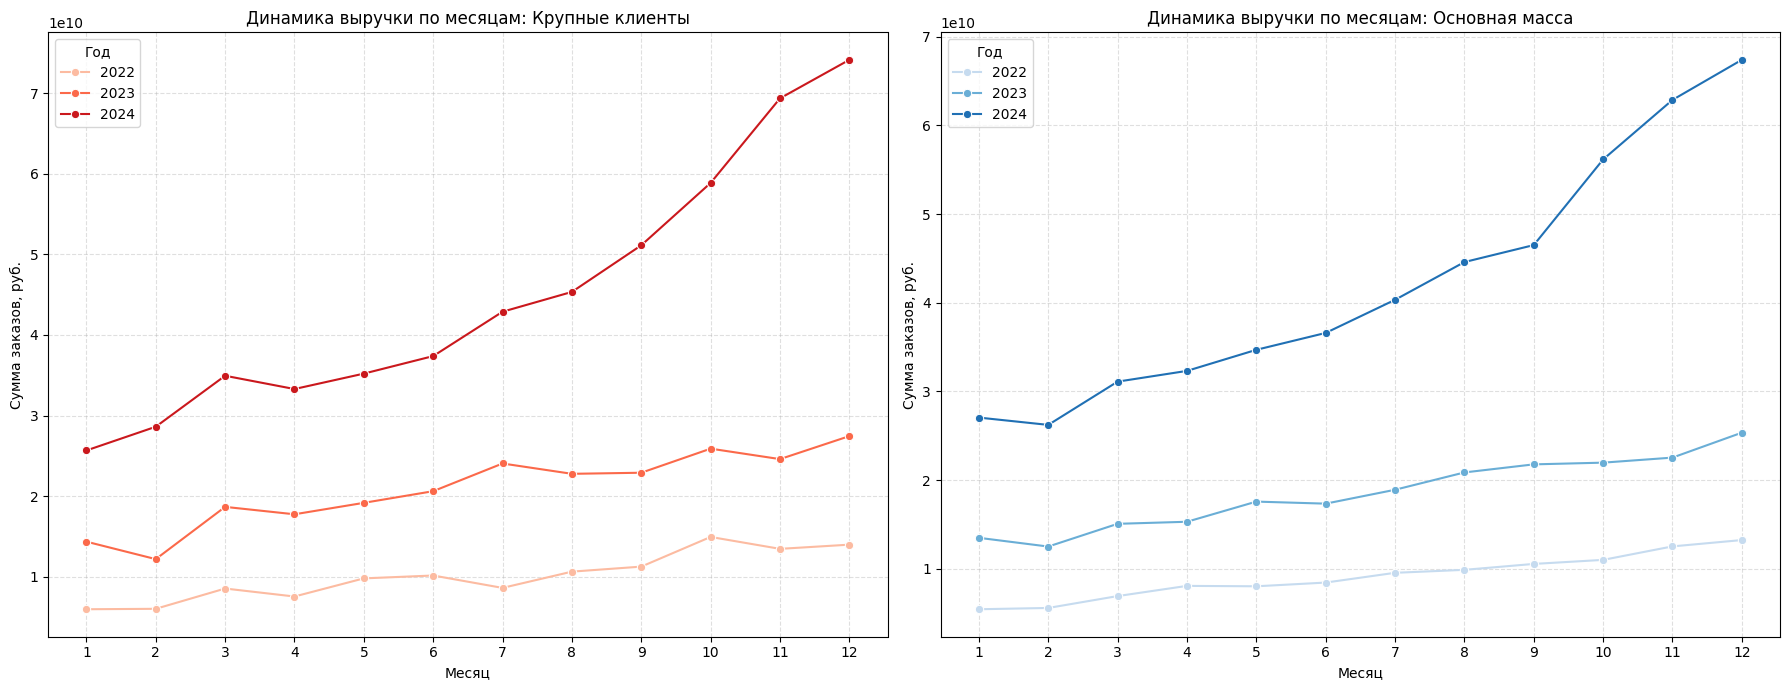

In [ ]:

# Сегментация
numeric_cols = ['volume_tons', 'order_value_rub', 'total_orders']
iqr_info = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    iqr_info[col] = {'upper_bound': upper}

upper_volume = iqr_info['volume_tons']['upper_bound']
upper_value  = iqr_info['order_value_rub']['upper_bound']
upper_orders = iqr_info['total_orders']['upper_bound']

mask_big = (
    (df['volume_tons'] > upper_volume) |
    (df['order_value_rub'] > upper_value) |
    (df['total_orders'] > upper_orders)
)

df['segment'] = np.where(mask_big, 'Крупные клиенты', 'Основная масса')

# Помесячная сумма
monthly_segment = (
    df
    .groupby(['segment', 'year', 'month'])['order_value_rub']
    .sum()
    .reset_index()
)

# Добавим все месяца, чтобы графики были полными
all_months = pd.DataFrame({
    "month": np.arange(1, 13)
})

segments = ["Крупные клиенты", "Основная масса"]
years = sorted(df['year'].dropna().unique())

expanded_data = []

for seg in segments:
    for yr in years:
        temp = monthly_segment[
            (monthly_segment['segment'] == seg) & (monthly_segment['year'] == yr)
        ].merge(all_months, on="month", how="right")
        temp['segment'] = seg
        temp['year'] = yr
        temp['order_value_rub'] = temp['order_value_rub'].fillna(0)
        expanded_data.append(temp)

monthly_segment_full = pd.concat(expanded_data)

# Графики
plt.figure(figsize=(18, 7))

palette_big = sns.color_palette("Reds", len(years))
palette_main = sns.color_palette("Blues", len(years))

for i, seg in enumerate(segments):
    plt.subplot(1, 2, i+1)
    segment_data = monthly_segment_full[monthly_segment_full['segment'] == seg]

    for idx, yr in enumerate(years):
        data_year = segment_data[segment_data['year'] == yr]
        sns.lineplot(
            data=data_year,
            x="month", y="order_value_rub",
            marker="o",
            label=str(yr),
            color=palette_big[idx] if seg == "Крупные клиенты" else palette_main[idx]
        )

    plt.title(f"Динамика выручки по месяцам: {seg}")
    plt.xlabel("Месяц")
    plt.ylabel("Сумма заказов, руб.")
    plt.xticks(range(1, 13))
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend(title="Год")

plt.tight_layout()
plt.show()


In [ ]:
display(df_cleaned.head())

,transaction_id,client_id,order_date,product_category,volume_tons,order_value_rub,payment_method,payment_delay_days,sales_channel,client_type,region,contract_size_category,year,month,quarter,day_of_week,is_churned,total_orders,total_value,avg_order_value
0,TXN1000000,CL11069,2022-03-07,Сжиженные газы,296.13,11544008.21,Оплата по факту,0,Дистрибьютор,Агрохолдинг,Москва,B,2022,3,1,0,0,72,1.746371e+09,2.425516e+07
1,TXN1000001,CL11435,2024-07-21,Полипропилен,24.35,2325458.45,Оплата по факту,0,Прямые продажи,Производитель упаковки,Приволжский,D,2024,7,3,6,0,78,2.150577e+08,2.757149e+06
2,TXN1000002,CL11074,2024-09-16,Полиэтилен,97.98,9893136.11,Отсрочка 60 дней,0,Онлайн-платформа,Производитель медицинских изделий,Санкт-Петербург,C,2024,9,3,0,0,75,5.806618e+08,7.742158e+06
3,TXN1000003,CL11438,2024-02-25,Полиэтилен,60.42,4359952.73,Предоплата,0,Долгосрочный контракт,Автопроизводитель,Башкортостан,C,2024,2,1,6,0,73,5.065963e+08,6.939676e+06
4,TXN1000004,CL10688,2024-07-19,МТБЭ,1527.14,90280701.71,Отсрочка 30 дней,0,Прямые продажи,Нефтегазовая компания,Татарстан,A,2024,7,3,4,0,71,4.305930e+09,6.064691e+07


В рамках исследования была проведена динамическая оценка помесячной выручки двух сегментов клиентской базы ПАО «СИБУР»: крупных клиентов и основной массы клиентов. Анализ охватывал период 2022–2024 гг. и позволил выявить выраженные сезонные закономерности, а также определить пики и периоды снижения деловой активности.

Временной анализ клиентской активности показал выраженную сезонность и различия в поведении двух сегментов — «крупных клиентов» и «основной массы». В обоих сегментах наблюдается общая тенденция повышения выручки во второй половине года, особенно в период с сентября по декабрь. Для крупного сегмента уровень выручки существенно выше и характеризуется более резкими колебаниями: в 2024 году, например, значения возрастают от примерно 2,6×10¹⁰ руб. в январе до более 7,4×10¹⁰ руб. в декабре, что указывает на повышенную активность крупных корпоративных заказчиков к концу года, вероятно связанную с планированием годовых закупок и заключением крупных контрактов.

Основная масса клиентов демонстрирует более плавный рост. В 2024 году выручка увеличивается с около 2,7×10¹⁰ руб. в январе до примерно 6,7×10¹⁰ руб. в декабре. Несмотря на меньшую волатильность, сезонный эффект также выражен: начало года характеризуется умеренным спадом, а устойчивый рост начинается с марта—апреля. При этом минимальные значения в большинстве лет приходятся на февраль, что может свидетельствовать о влиянии праздничного периода и замедления деловой активности.

Таким образом, сезонный характер спроса прослеживается у обеих групп клиентов, однако крупные клиенты вносят основные колебания и формируют выраженные пики годовой выручки. Эти результаты могут служить основанием для разработки дифференцированных маркетинговых стратегий: активизации стимулирующих кампаний в период пониженной активности (февраль–апрель) и усиления персонализированных предложений в периоды традиционного роста (сентябрь–декабрь).

# Анализ клиентов по регионам (Региональные особенности важно учитывать в коммуникациях и предложениях)

Лидирующие регионы по объёму заказов (sum volume_tons)

Регионы с высоким средним чеком (mean order_value_rub)

Плотность клиентской базы по регионам (количество уникальных клиентов)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Берём свежую копию датасета
df = df_cleaned.copy()

# 2. СЕГМЕНТАЦИЯ на крупных и основную массу
numeric_cols = ['volume_tons', 'order_value_rub', 'total_orders']
iqr_info = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    iqr_info[col] = {'upper_bound': upper}

upper_volume = iqr_info['volume_tons']['upper_bound']
upper_value  = iqr_info['order_value_rub']['upper_bound']
upper_orders = iqr_info['total_orders']['upper_bound']

mask_big = (
    (df['volume_tons'] > upper_volume) |
    (df['order_value_rub'] > upper_value) |
    (df['total_orders'] > upper_orders)
)

df['segment'] = np.where(mask_big, 'Крупные клиенты', 'Основная масса')

# 3. Удаляем Санкт-Петербург
df = df[df['region'] != 'Санкт-Петербург'].copy()
if str(df['region'].dtype).startswith('category'):
    df['region'] = df['region'].cat.remove_categories(['Санкт-Петербург'])

# 4. Агрегаты по регионам и сегментам
group_region = (
    df
    .groupby(['region', 'segment'], observed=False)
    .agg(
        total_volume=('volume_tons', 'sum'),
        avg_check=('order_value_rub', 'mean'),
        unique_clients=('client_id', 'nunique')
    )
    .reset_index()
)

group_big = group_region[group_region['segment'] == 'Крупные клиенты']
group_main = group_region[group_region['segment'] == 'Основная масса']

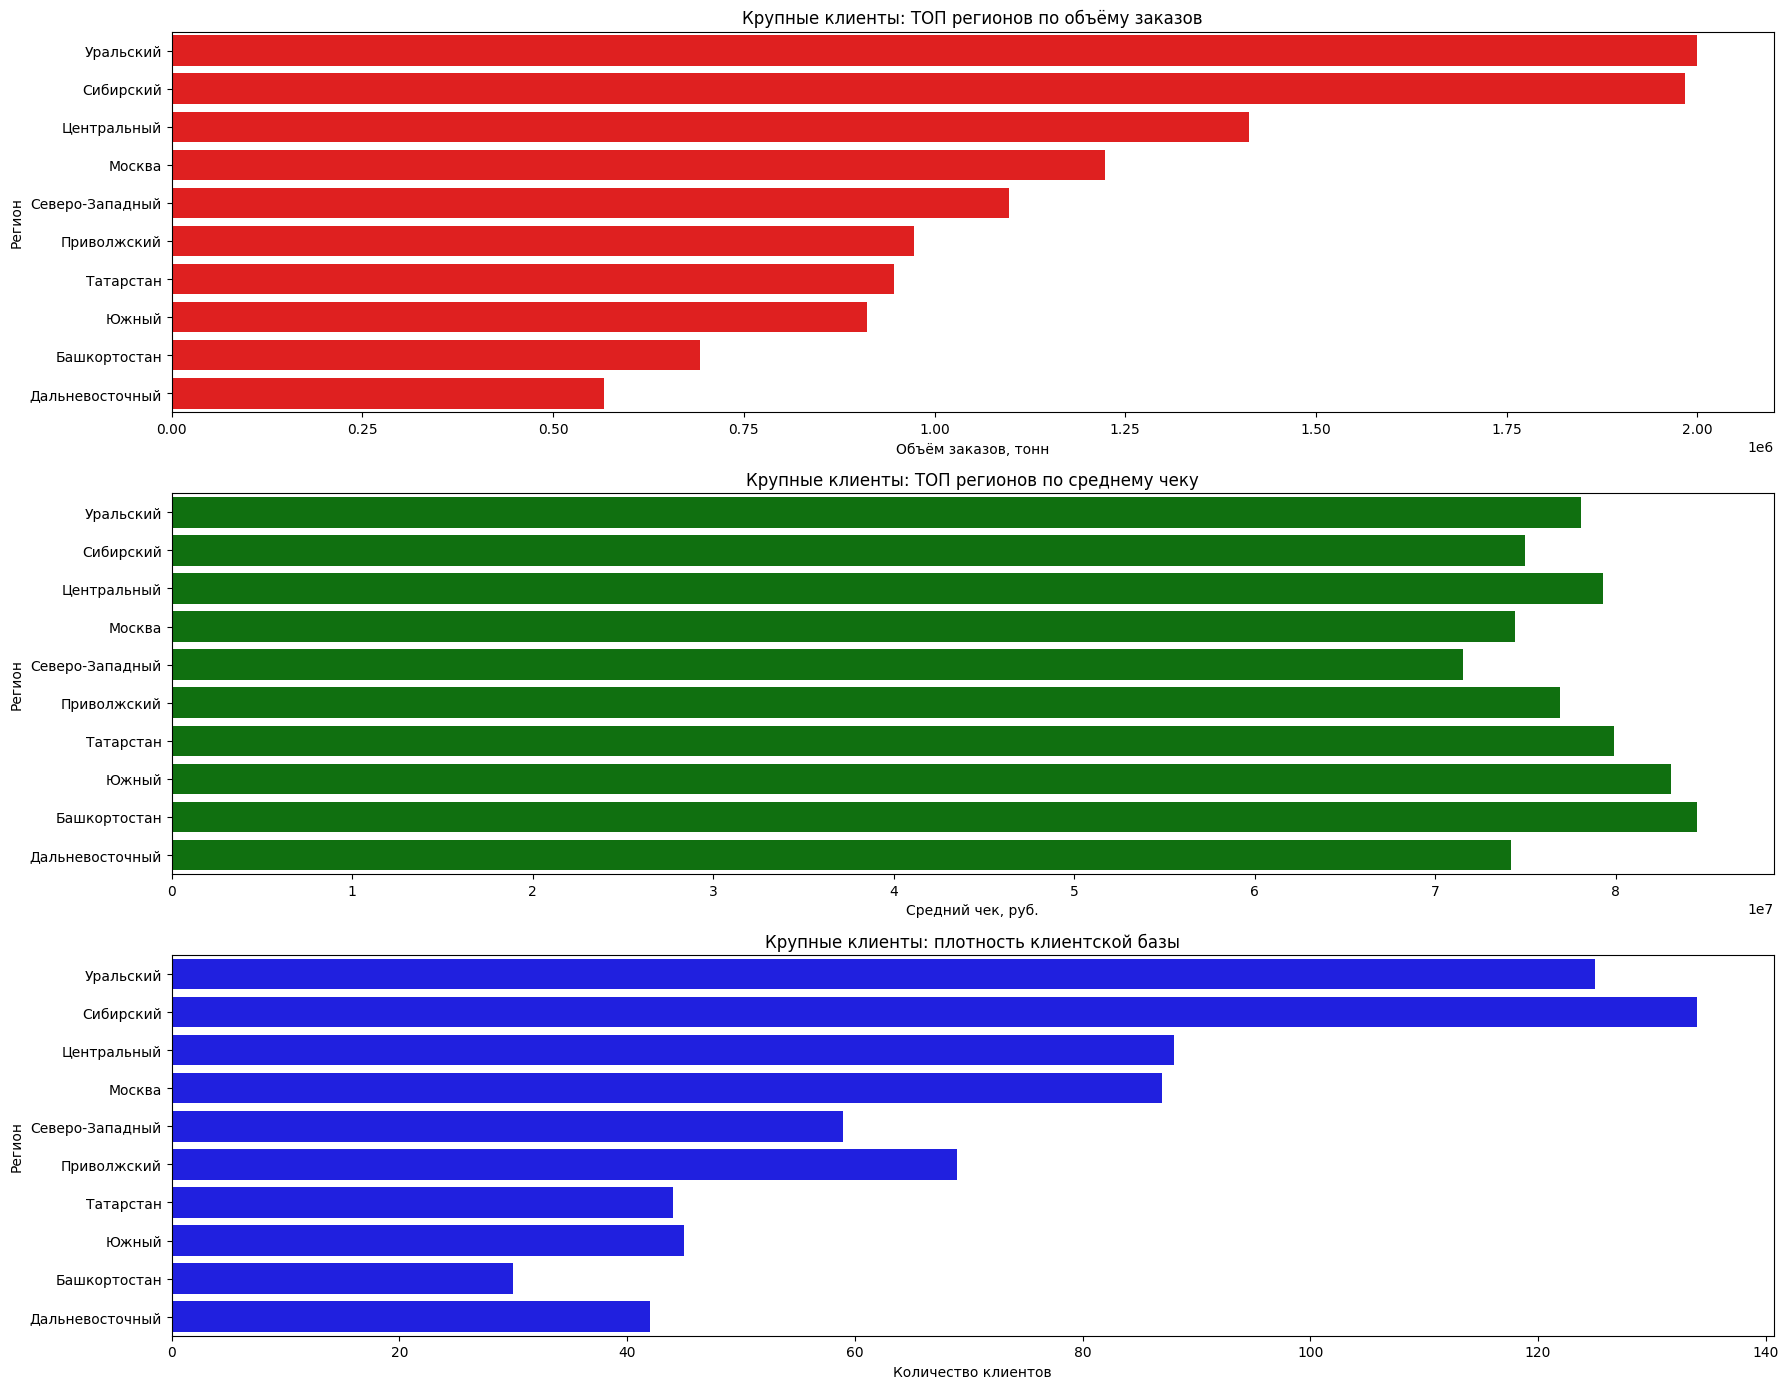

In [ ]:
# КРУПНЫЕ КЛИЕНТЫ !!!!!
plt.figure(figsize=(18, 14))

# ТОП-10 регионов по объёму
top_regions_big = (
    group_big
    .sort_values('total_volume', ascending=False)
    .head(10)['region']
)

group_big_top = group_big[group_big['region'].isin(top_regions_big)]

# 1. Объём заказов
plt.subplot(3, 1, 1)
sns.barplot(
    data=group_big_top,
    x='total_volume',
    y='region',
    order=top_regions_big,
    color='red'
)
plt.title('Крупные клиенты: ТОП регионов по объёму заказов')
plt.xlabel('Объём заказов, тонн')
plt.ylabel('Регион')

# 2. Средний чек
plt.subplot(3, 1, 2)
sns.barplot(
    data=group_big_top,
    x='avg_check',
    y='region',
    order=top_regions_big,
    color='green'
)
plt.title('Крупные клиенты: ТОП регионов по среднему чеку')
plt.xlabel('Средний чек, руб.')
plt.ylabel('Регион')

# 3. Количество клиентов
plt.subplot(3, 1, 3)
sns.barplot(
    data=group_big_top,
    x='unique_clients',
    y='region',
    order=top_regions_big,
    color='blue'
)
plt.title('Крупные клиенты: плотность клиентской базы')
plt.xlabel('Количество клиентов')
plt.ylabel('Регион')

plt.tight_layout()
plt.show()

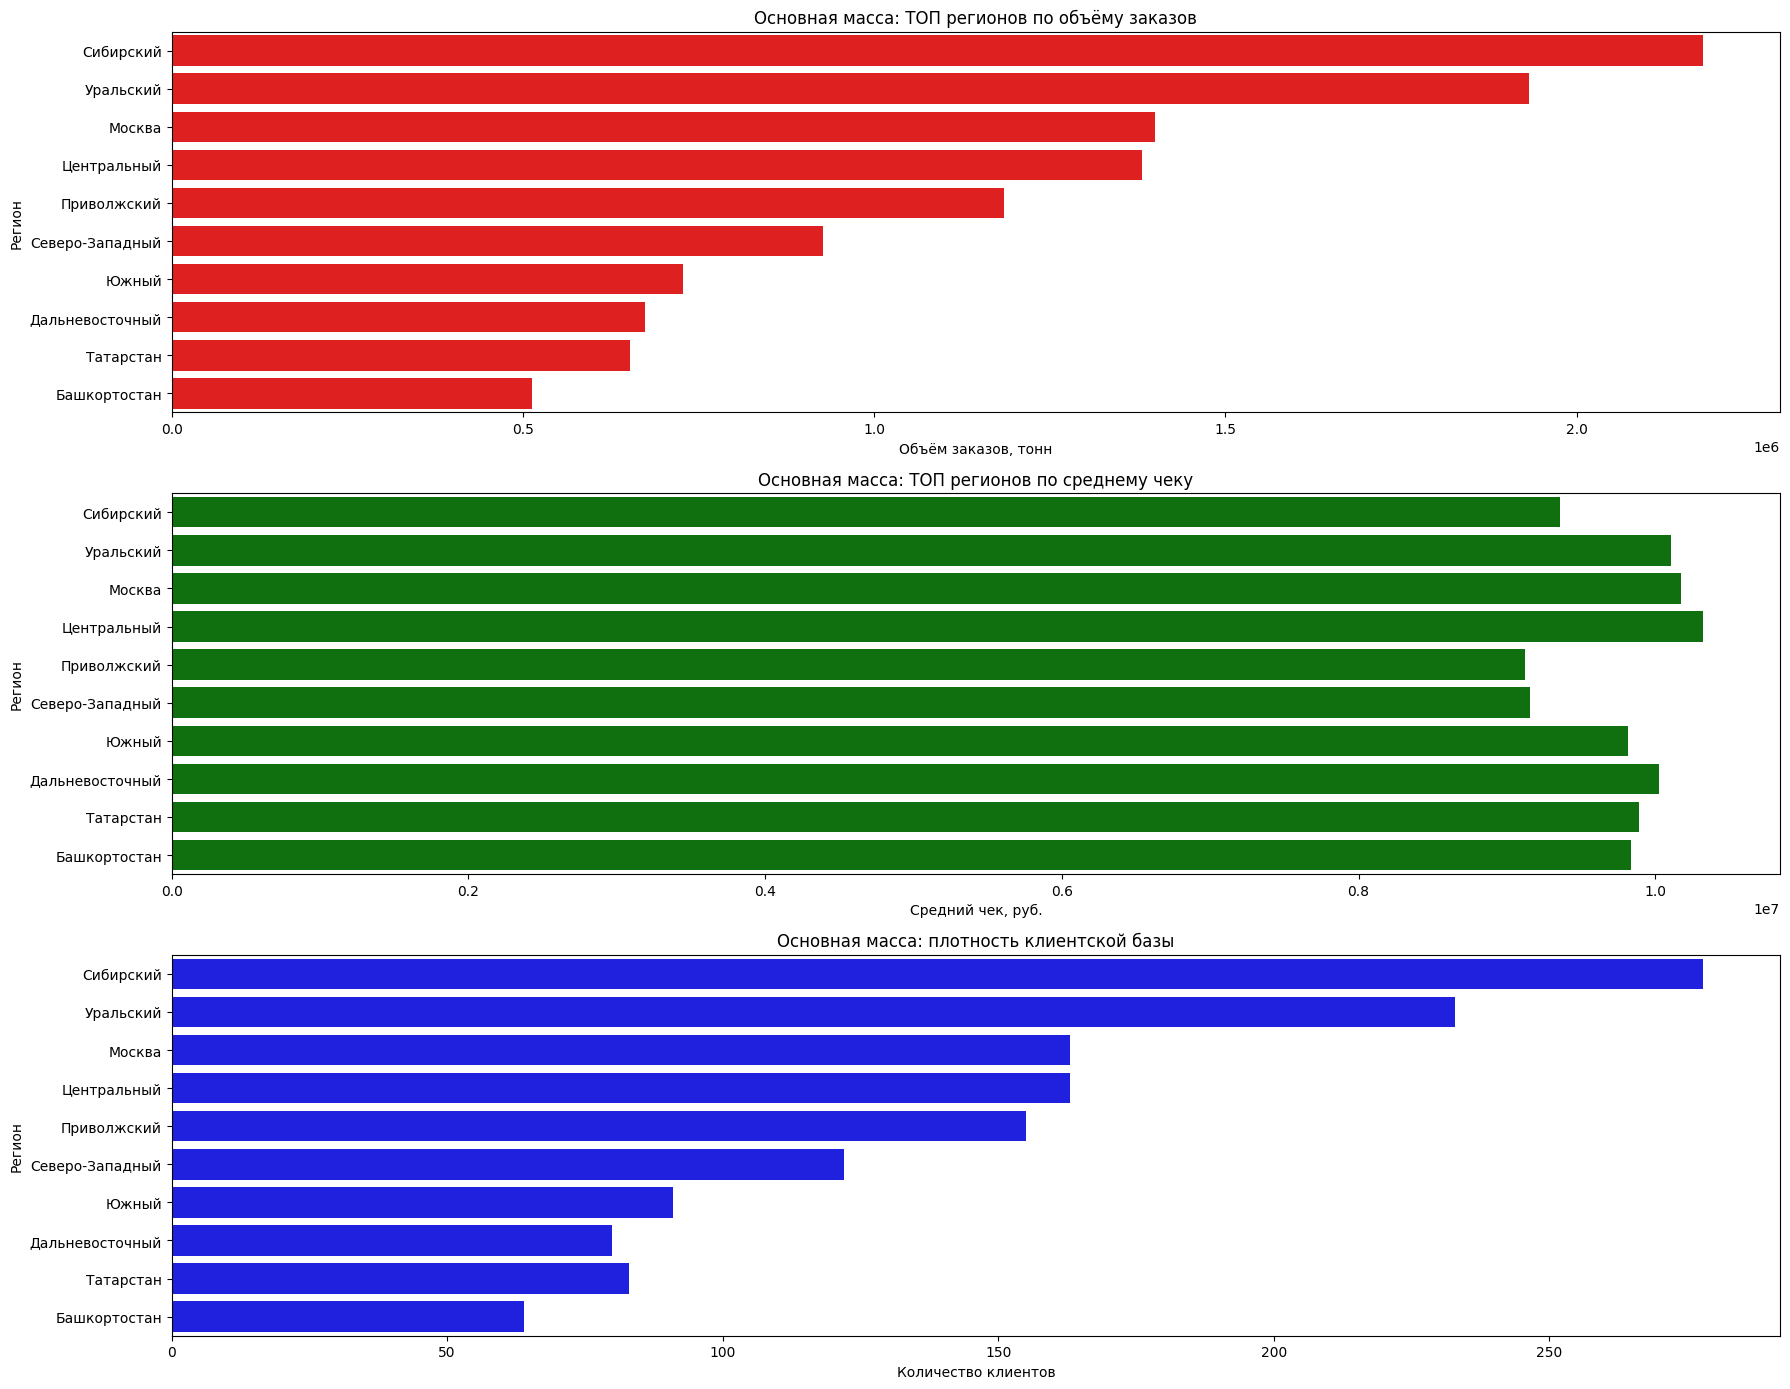

In [ ]:
plt.figure(figsize=(18, 14))

# ТОП-10 регионов по объёму
top_regions_main = (
    group_main
    .sort_values('total_volume', ascending=False)
    .head(10)['region']
)

group_main_top = group_main[group_main['region'].isin(top_regions_main)]

# 1. Объём заказов
plt.subplot(3, 1, 1)
sns.barplot(
    data=group_main_top,
    x='total_volume',
    y='region',
    order=top_regions_main,
    color='red'
)
plt.title('Основная масса: ТОП регионов по объёму заказов')
plt.xlabel('Объём заказов, тонн')
plt.ylabel('Регион')

# 2. Средний чек
plt.subplot(3, 1, 2)
sns.barplot(
    data=group_main_top,
    x='avg_check',
    y='region',
    order=top_regions_main,
    color='green'
)
plt.title('Основная масса: ТОП регионов по среднему чеку')
plt.xlabel('Средний чек, руб.')
plt.ylabel('Регион')

# 3. Количество клиентов
plt.subplot(3, 1, 3)
sns.barplot(
    data=group_main_top,
    x='unique_clients',
    y='region',
    order=top_regions_main,
    color='blue'
)
plt.title('Основная масса: плотность клиентской базы')
plt.xlabel('Количество клиентов')
plt.ylabel('Регион')

plt.tight_layout()
plt.show()


Региональный анализ показал существенные различия в структуре клиентской активности между сегментами «крупные клиенты» и «основная масса». На графике, отражающем распределение объёма заказов, лидирующими регионами по суммарному тоннажу для обеих групп являются Сибирский и Уральский федеральные округа. При этом основная масса формирует в Сибирском регионе максимальный объём заказов — около 2,25 млн тонн, в то время как крупные клиенты обеспечивают порядка 2,0 млн тонн. Аналогичная ситуация наблюдается в Уральском округе, где основной сегмент также превышает по объёму крупный. Это указывает на высокую вовлечённость широкого клиентского слоя в данных регионах. В противоположность этому, такие регионы как Татарстан, Южный и Дальневосточный формируют заметно больший вклад со стороны крупных клиентов, что свидетельствует о присутствии в этих регионах крупных промышленных потребителей с высоким уровнем закупок.

Анализ среднего чека демонстрирует однозначную тенденцию: по всем регионам средняя стоимость заказа у крупного сегмента значительно выше, чем у основной массы. Средний чек крупных клиентов в регионах достигает величин свыше 70–80 млн руб., в то время как средний чек основной массы остаётся на уровне 1–1,5 млн руб.. Эта разница отражает стратегически важную роль крупных клиентов для формирования денежного потока компании, а также подтверждает необходимость индивидуализированного подхода в маркетинговых коммуникациях с данным сегментом.

Плотность клиентской базы демонстрирует противоположный результат: основная масса клиентов существенно превосходит крупный сегмент практически во всех регионах. Максимальные показатели наблюдаются в Сибирском регионе (около 275 уникальных клиентов) и Уральском (порядка 240), тогда как количество крупных клиентов там составляет около 130 и 110 соответственно. Это означает, что данные регионы обладают наиболее развитой и широкой потребительской структурой. В регионах Южный, Татарстан и Дальневосточный плотность основной массы ниже, но доля крупных клиентов в этих регионах заметно выше, что подтверждает их роль как точек концентрации стратегически значимых партнёров.

В целом результаты анализа показывают, что:
- Сибирский и Уральский регионы являются ключевыми для охвата широкой клиентской базы и масштабных маркетинговых кампаний.

- Татарстан, Южный и Дальневосточный регионы — стратегические зоны работы с крупными клиентами благодаря высокому среднему чеку и значительному вкладу в выручку.

Учитывая сильную дифференциацию по регионам, маркетинговая стратегия компании должна включать как массовые коммуникации в регионах с высокой плотностью, так и персонализированные решения для территорий с ярко выраженным присутствием крупных покупателей.

# Анализ по категориям продуктам


Прибыльность категории (суммарная выручка, order_value_rub)

Массовость категории (объём заказов, volume_tons)

Востребованность крупными клиентами (количество заказов / плотность сегмента)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Берём рабочий датафрейм (важно, чтобы колонка segment уже была создана!)
df = df_cleaned.copy()

df['segment'] = np.where(mask_big, 'Крупные клиенты', 'Основная масса')

# 2. Группировка по категориям
group_prod = (
    df
    .groupby(['product_category', 'segment'], observed=False)
    .agg(
        total_revenue=('order_value_rub', 'sum'),
        total_volume=('volume_tons', 'sum'),
        order_count=('transaction_id', 'count')
    )
    .reset_index()
)

prod_big = group_prod[group_prod['segment'] == 'Крупные клиенты']
prod_main = group_prod[group_prod['segment'] == 'Основная масса']

# Порядок категорий по убыванию прибыльности
category_order = (
    group_prod
    .groupby('product_category')['total_revenue']
    .sum()
    .sort_values(ascending=False)
    .index
)

/tmp/ipython-input-2359007470.py:28: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



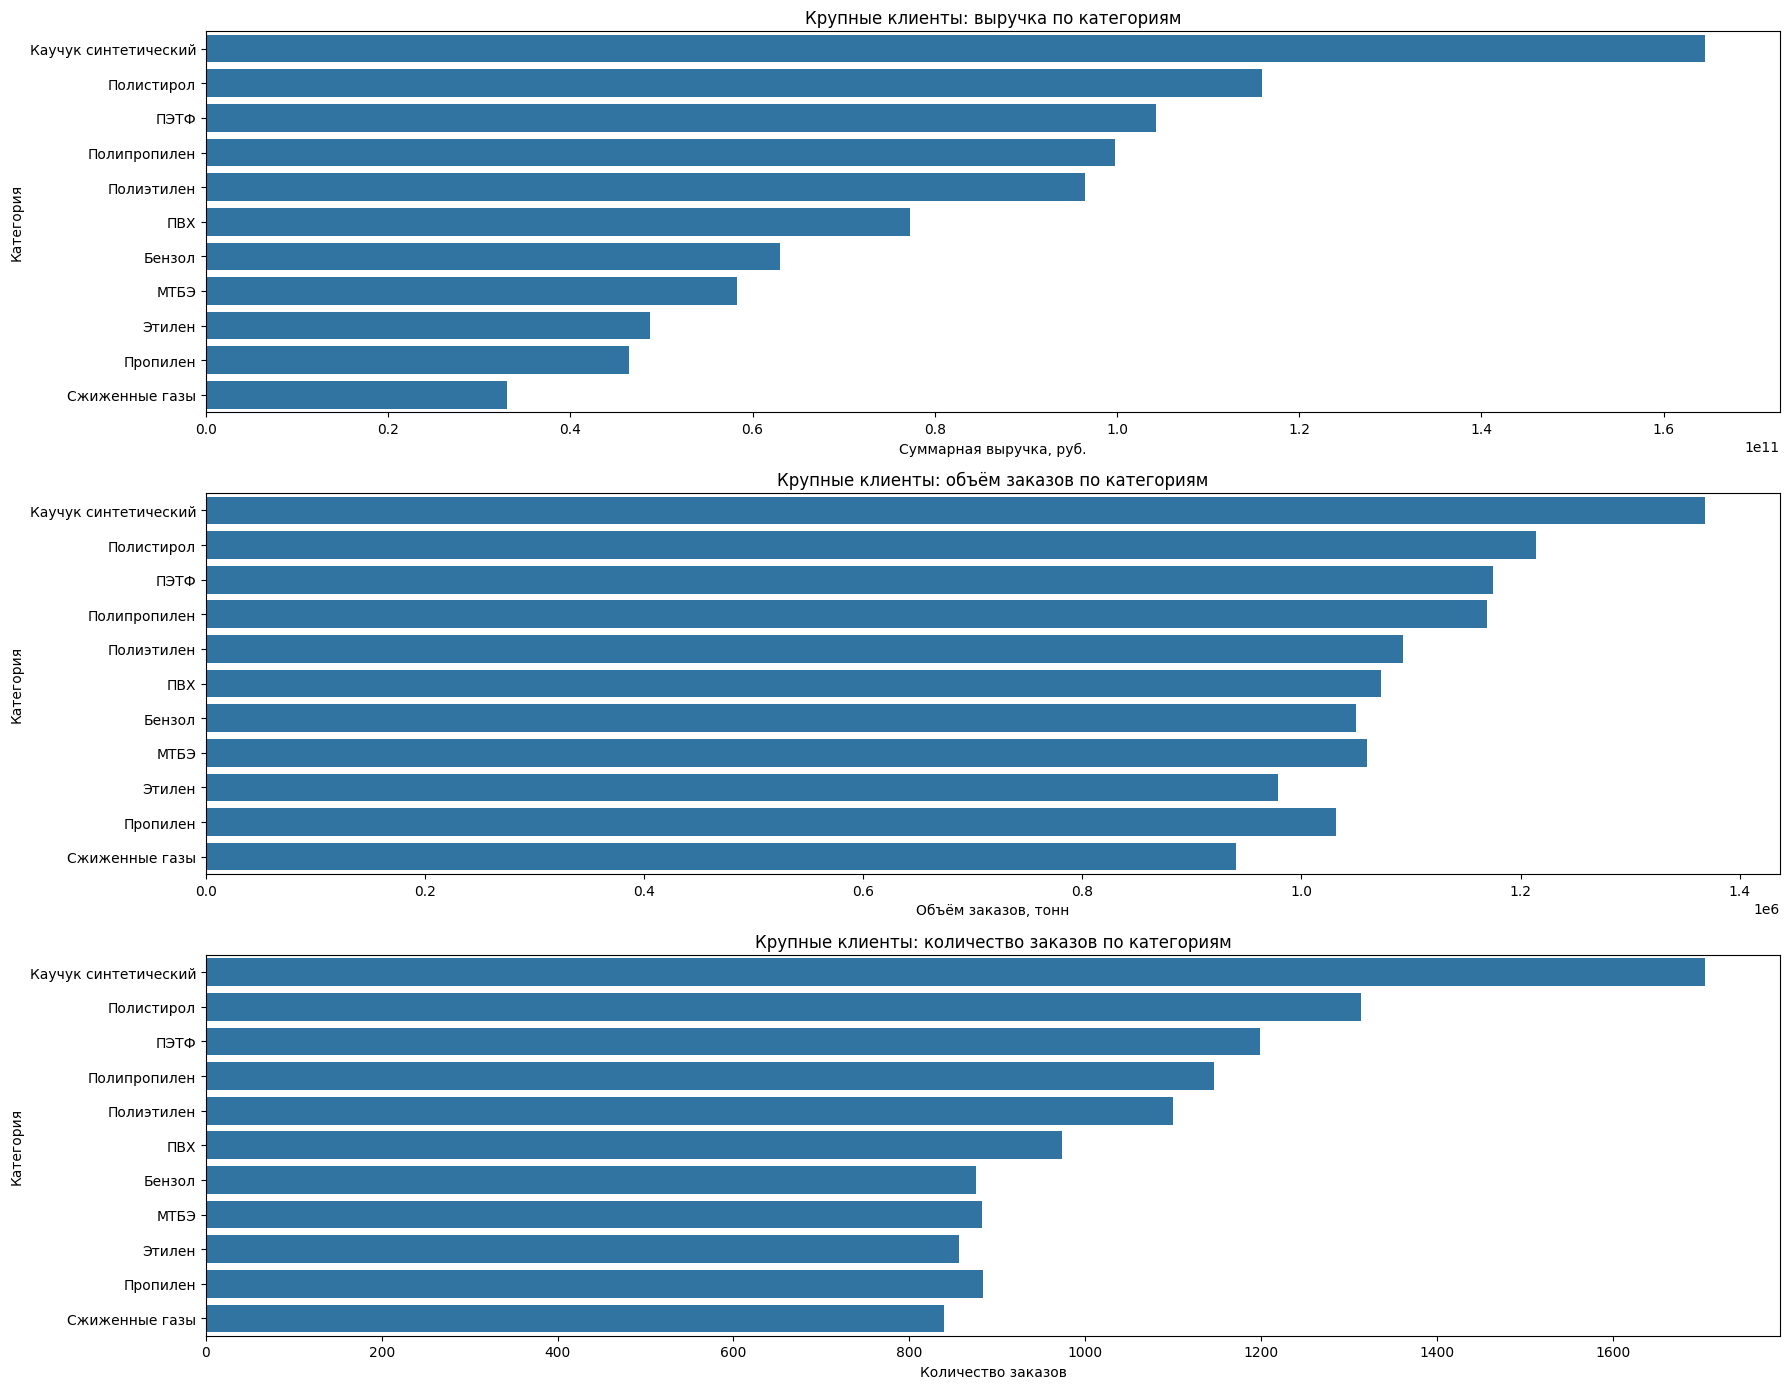

In [ ]:
# КРУПНЫЕ КЛИЕНТЫ

plt.figure(figsize=(18, 14))

# порядок категорий по выручке
order_big = (
    prod_big
    .sort_values('total_revenue', ascending=False)
    ['product_category']
)

# 1. Выручка
plt.subplot(3, 1, 1)
sns.barplot(
    data=prod_big,
    x='total_revenue',
    y='product_category',
    order=order_big,
    color='#1f78b4'
)
plt.title('Крупные клиенты: выручка по категориям')
plt.xlabel('Суммарная выручка, руб.')
plt.ylabel('Категория')

# 2. Объём
plt.subplot(3, 1, 2)
sns.barplot(
    data=prod_big,
    x='total_volume',
    y='product_category',
    order=order_big,
    color='#1f78b4'
)
plt.title('Крупные клиенты: объём заказов по категориям')
plt.xlabel('Объём заказов, тонн')
plt.ylabel('Категория')

# 3. Количество заказов
plt.subplot(3, 1, 3)
sns.barplot(
    data=prod_big,
    x='order_count',
    y='product_category',
    order=order_big,
    color='#1f78b4'
)
plt.title('Крупные клиенты: количество заказов по категориям')
plt.xlabel('Количество заказов')
plt.ylabel('Категория')

plt.tight_layout()
plt.show()


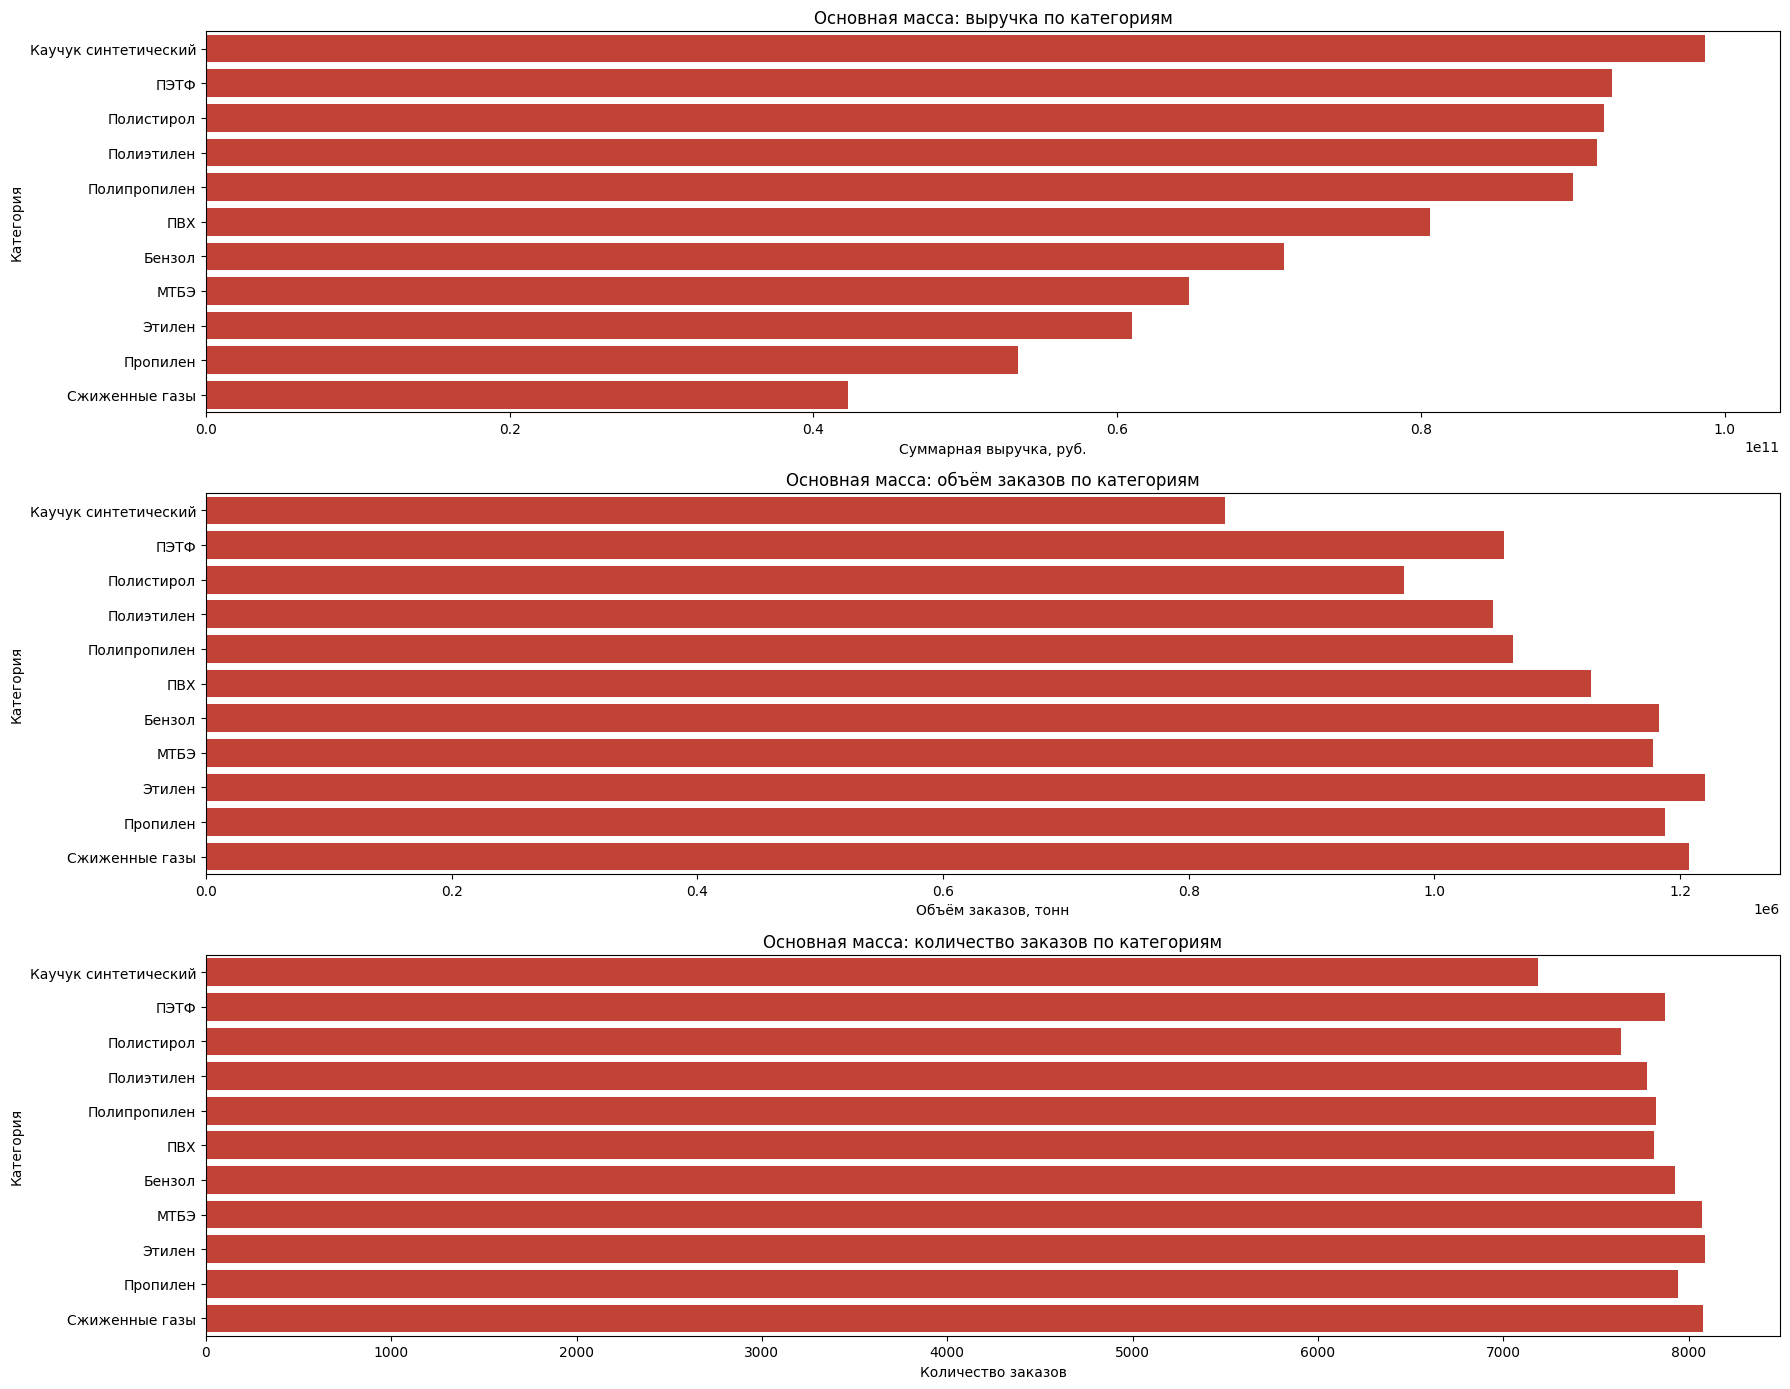

In [ ]:
# ОБЩИЕ КЛИЕНТЫ

plt.figure(figsize=(18, 14))

order_main = (
    prod_main
    .sort_values('total_revenue', ascending=False)
    ['product_category']
)

# 1. Выручка
plt.subplot(3, 1, 1)
sns.barplot(
    data=prod_main,
    x='total_revenue',
    y='product_category',
    order=order_main,
    color='#d7301f'   # красный для основной массы
)
plt.title('Основная масса: выручка по категориям')
plt.xlabel('Суммарная выручка, руб.')
plt.ylabel('Категория')

# 2. Объём
plt.subplot(3, 1, 2)
sns.barplot(
    data=prod_main,
    x='total_volume',
    y='product_category',
    order=order_main,
    color='#d7301f'
)
plt.title('Основная масса: объём заказов по категориям')
plt.xlabel('Объём заказов, тонн')
plt.ylabel('Категория')

# 3. Количество заказов
plt.subplot(3, 1, 3)
sns.barplot(
    data=prod_main,
    x='order_count',
    y='product_category',
    order=order_main,
    color='#d7301f'
)
plt.title('Основная масса: количество заказов по категориям')
plt.xlabel('Количество заказов')
plt.ylabel('Категория')

plt.tight_layout()
plt.show()


Результаты анализа категорий нефтехимической продукции позволяют выделить существенные отличия в структуре спроса и создаваемой выручке между крупными клиентами и основной массой покупателей.

С точки зрения прибыльности, для обеих групп абсолютным лидером является синтетический каучук, формирующий максимальные объёмы выручки — около 1.65×10¹¹ руб. у крупного сегмента и примерно 1.00×10¹¹ руб. у массового. Значительный вклад в доход обеспечивают также полистирол, ПЭТФ, полипропилен и полиэтилен, что указывает на их устойчивое рыночное положение и широкое применение в различных отраслях промышленности. При этом наблюдается закономерность: во всех категориях выручка, создаваемая крупными клиентами, заметно превышает показатели массового сегмента, что подтверждает их ключевую роль в структуре доходов компании.

По критерию массовости (объём заказов в тоннах) лидирующие позиции также занимает синтетический каучук, достигающий объёма около 1.35 млн тонн у крупных клиентов и порядка 1.20 млн тонн у основной массы. Высокие значения наблюдаются по полистиролу, ПЭТФ, полипропилену и полиэтилену, что полностью коррелирует с распределением выручки. Данные подтверждают, что именно эти категории являются для СИБУР базовыми с точки зрения производственных и сбытовых объёмов.

С позиции востребованности (количества заказов) ситуация несколько отличается. Для массового сегмента количество заказов по всем категориям располагается в диапазоне 7000–8200 заказов, что свидетельствует о высокой стабильности и равномерном распределении спроса между продуктами. В сегменте крупных клиентов количество заказов значительно ниже (от 700 до 1800 заказов в зависимости от категории), однако качественно такие заказы существенно крупнее по стоимости и объёму. Максимальная активность крупных клиентов наблюдается в категориях синтетический каучук, полистирол и ПЭТФ, что совпадает с общей картиной прибыльности.

Обобщая результаты, можно выделить несколько ключевых выводов:

- Синтетический каучук — наиболее значимая категория по трём ключевым метрикам: выручке, массивности и востребованности у крупных клиентов.

- Полистирол, ПЭТФ, полипропилен и полиэтилен формируют устойчивую вторую линию высокоприбыльных и массовых продуктов.

- Крупные клиенты обеспечивают существенно больший вклад в доход компании по всем категориям, несмотря на меньшее количество транзакций.

- Для массового сегмента характерно равномерное распределение числа заказов по категориям, что указывает на диверсифицированную потребность.

Подход к маркетинговым стратегиям должен учитывать различия сегментов: для крупных клиентов акцент важнее делать на индивидуальное обслуживание и условий контрактов по топ-категориям, для массового — на удобство размещения заказов и поддержание широкой продуктовой линейки.

ИТОГОВЫЙ:

In [ ]:
# ВРЕМЕННОЙ АНАЛИЗ
# агрегируем помесячную выручку по сегментам
df_time = df.copy()
df_time['order_date'] = pd.to_datetime(df_time['order_date'], errors='coerce')
df_time['month'] = df_time['order_date'].dt.month

monthly_segment_rev = (
    df_time
    .groupby(['segment', 'month'])['order_value_rub']
    .sum()
    .reset_index()
    .rename(columns={'order_value_rub': 'Revenue'})
)

segments = monthly_segment_rev['segment'].unique()

for seg in segments:
    seg_df = monthly_segment_rev[monthly_segment_rev['segment'] == seg]

    max_row = seg_df.loc[seg_df['Revenue'].idxmax()]
    min_row = seg_df.loc[seg_df['Revenue'].idxmin()]

    print(f"\nСегмент: {seg}")
    print(f"Пик выручки по месяцам: месяц {int(max_row['month'])} – {max_row['Revenue']:.2f} руб.")
    print(f"Спад выручки по месяцам: месяц {int(min_row['month'])} – {min_row['Revenue']:.2f} руб.")
    print(f"Разница: {((max_row['Revenue'] - min_row['Revenue']) / min_row['Revenue'] * 100):.2f}%")
    print(f"Средняя выручка в месяц: {seg_df['Revenue'].mean():.2f}")
    print(f"Стандартное отклонение по месяцам: {seg_df['Revenue'].std():.2f}")


Сегмент: Крупные клиенты
Пик выручки по месяцам: месяц 12 – 115563182917.22 руб.
Спад выручки по месяцам: месяц 1 – 45981618555.63 руб.
Разница: 151.32%
Средняя выручка в месяц: 75669237482.13
Стандартное отклонение по месяцам: 22675510881.13

Сегмент: Основная масса
Пик выручки по месяцам: месяц 12 – 105992439182.72 руб.
Спад выручки по месяцам: месяц 2 – 44343174192.79 руб.
Разница: 139.03%
Средняя выручка в месяц: 69833136908.20
Стандартное отклонение по месяцам: 20057154178.38


In [ ]:
# АНАЛИЗ ПО РЕГИОНАМ

# исключаем Санкт-Петербург из анализа
df_regions = df[df['region'] != 'Санкт-Петербург'].copy()

# агрегируем по регионам и сегментам
region_seg = (
    df_regions
    .groupby(['region', 'segment'])['order_value_rub']
    .sum()
    .reset_index()
    .rename(columns={'order_value_rub': 'Revenue'})
)

region_seg = region_seg[region_seg['Revenue'] > 0].copy()

segments = region_seg['segment'].unique()

for seg in segments:
    seg_df = region_seg[region_seg['segment'] == seg]

    max_row = seg_df.loc[seg_df['Revenue'].idxmax()]
    min_row = seg_df.loc[seg_df['Revenue'].idxmin()]

    print(f"\nСегмент: {seg}")
    print(f"Регион-лидер по выручке: {max_row['region']} – {max_row['Revenue']:.2f} руб.")
    print(f"Регион с минимальной выручкой: {min_row['region']} – {min_row['Revenue']:.2f} руб.")
    print(f"Разница: {((max_row['Revenue'] - min_row['Revenue']) / min_row['Revenue'] * 100):.2f}%")
    print(f"Средняя выручка на регион: {seg_df['Revenue'].mean():.2f}")
    print(f"Стандартное отклонение по регионам: {seg_df['Revenue'].std():.2f}")



Сегмент: Крупные клиенты
Регион-лидер по выручке: Уральский – 148271831351.66 руб.
Регион с минимальной выручкой: Дальневосточный – 43102473379.87 руб.
Разница: 244.00%
Средняя выручка на регион: 88131320621.71
Стандартное отклонение по регионам: 36240497295.51

Сегмент: Основная масса
Регион-лидер по выручке: Сибирский – 152506246390.98 руб.
Регион с минимальной выручкой: Башкортостан – 35331114157.40 руб.
Разница: 331.65%
Средняя выручка на регион: 80270045448.39
Стандартное отклонение по регионам: 39692719416.16


/tmp/ipython-input-1837992810.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# АНАЛИЗ ПО КАТЕГОРИЯМ ПРОДУКТА
# агрегируем по категориям и сегментам
prod_seg = (
    df
    .groupby(['product_category', 'segment'])['order_value_rub']
    .sum()
    .reset_index()
    .rename(columns={'order_value_rub': 'Revenue'})
)

segments = prod_seg['segment'].unique()

for seg in segments:
    seg_df = prod_seg[prod_seg['segment'] == seg]

    max_row = seg_df.loc[seg_df['Revenue'].idxmax()]
    min_row = seg_df.loc[seg_df['Revenue'].idxmin()]

    print(f"\nСегмент: {seg}")
    print(f"Наиболее прибыльная категория: {max_row['product_category']} – {max_row['Revenue']:.2f} руб.")
    print(f"Наименее прибыльная категория: {min_row['product_category']} – {min_row['Revenue']:.2f} руб.")
    print(f"Разница: {((max_row['Revenue'] - min_row['Revenue']) / min_row['Revenue'] * 100):.2f}%")
    print(f"Средняя выручка на категорию: {seg_df['Revenue'].mean():.2f}")
    print(f"Стандартное отклонение по категориям: {seg_df['Revenue'].std():.2f}")



Сегмент: Крупные клиенты
Наиболее прибыльная категория: Каучук синтетический – 164553295502.69 руб.
Наименее прибыльная категория: Сжиженные газы – 33044898319.96 руб.
Разница: 397.97%
Средняя выручка на категорию: 82548259071.41
Стандартное отклонение по категориям: 38337210251.11

Сегмент: Основная масса
Наиболее прибыльная категория: Каучук синтетический – 98700233265.63 руб.
Наименее прибыльная категория: Сжиженные газы – 42244452052.85 руб.
Разница: 133.64%
Средняя выручка на категорию: 76181603899.86
Стандартное отклонение по категориям: 18796077509.28


/tmp/ipython-input-229355378.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# **Проведение RFM-анализа**

In [ ]:
display(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          98000 non-null  object        
 1   client_id               98000 non-null  string        
 2   order_date              98000 non-null  datetime64[ns]
 3   product_category        98000 non-null  category      
 4   volume_tons             98000 non-null  float64       
 5   order_value_rub         98000 non-null  float64       
 6   payment_method          98000 non-null  category      
 7   payment_delay_days      98000 non-null  int64         
 8   sales_channel           98000 non-null  category      
 9   client_type             98000 non-null  object        
 10  region                  98000 non-null  category      
 11  contract_size_category  98000 non-null  category      
 12  year                    98000 non-null  int64 

None

**код ниже необходим для переноса segment в нужный мне датасет**

In [ ]:
df_rfm = df_cleaned.copy()

# --- пересчёт IQR для сегментации ---
numeric_cols = ['volume_tons', 'order_value_rub', 'total_orders']
iqr_info = {}

for col in numeric_cols:
    Q1 = df_rfm[col].quantile(0.25)
    Q3 = df_rfm[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    iqr_info[col] = upper

mask_big = (
    (df_rfm['volume_tons'] > iqr_info['volume_tons']) |
    (df_rfm['order_value_rub'] > iqr_info['order_value_rub']) |
    (df_rfm['total_orders'] > iqr_info['total_orders'])
)

df_rfm['segment'] = np.where(mask_big, 'Крупные клиенты', 'Основная масса')

РФМ-анализ я буду проводить по двум группам клиентов - крупные и общие, поскольку поведенческие паттерны у всех клиентов одинаковые, но они требуют разных клиентских стратегий

In [ ]:
df_big = df_rfm[df_rfm['segment'] == 'Крупные клиенты'].copy()
df_main = df_rfm[df_rfm['segment'] == 'Основная масса'].copy()

**расчёт RFM-метрик (одинаково для обоих)**

In [ ]:
max_date = df_rfm['order_date'].max()

def build_rfm(df):
    rfm = (
        df
        .groupby('client_id')
        .agg(
            recency=('order_date', lambda x: (max_date - x.max()).days),
            frequency=('transaction_id', 'nunique'),
            monetary=('order_value_rub', 'sum')
        )
        .reset_index()
    )
    return rfm

rfm_big = build_rfm(df_big)
rfm_main = build_rfm(df_main)
display(rfm_big,rfm_main)

,client_id,recency,frequency,monetary
0,CL10001,14,43,3.888540e+09
1,CL10003,0,11,8.423046e+08
2,CL10009,0,39,3.646058e+09
3,CL10010,32,13,6.864125e+08
4,CL10011,151,6,4.260043e+08
...,...,...,...,...
748,CL11491,822,1,2.707191e+07
749,CL11492,8,2,9.606945e+07
750,CL11493,10,44,3.827051e+09
751,CL11494,40,14,6.992501e+08


,client_id,recency,frequency,monetary
0,CL10000,2,62,4.044249e+08
1,CL10001,1,24,4.552559e+08
2,CL10002,12,57,4.417767e+08
3,CL10003,0,60,9.553616e+08
4,CL10004,5,79,5.934886e+08
...,...,...,...,...
1493,CL11495,1,67,1.872072e+08
1494,CL11496,16,60,1.549231e+08
1495,CL11497,5,72,1.924953e+08
1496,CL11498,12,66,5.449795e+08


**Для крупных клиентов**

R:

    ≤ 14 дней — активные контракты

    15–60 — умеренная активность

    60 — риск потери

F:

    ≤ 10 — нерегулярные

    11–25 — регулярные

    25 — системные закупки

M:

    до 100 млн — низкий вклад

    100–500 млн — средний

    500 млн — ключевые клиенты

In [ ]:
# RECENCY (дни)
rfm_big['R'] = pd.cut(
    rfm_big['recency'],
    bins=[-1, 14, 60, 10**9],
    labels=[3, 2, 1]
)

# FREQUENCY (количество заказов)
rfm_big['F'] = pd.cut(
    rfm_big['frequency'],
    bins=[0, 10, 25, 10**9],
    labels=[1, 2, 3]
)

# MONETARY (выручка)
rfm_big['M'] = pd.cut(
    rfm_big['monetary'],
    bins=[0, 1e8, 5e8, 10**12],
    labels=[1, 2, 3]
)


# приведение R, F, M к числовому типу
rfm_big[['R', 'F', 'M']] = rfm_big[['R', 'F', 'M']].astype(int)

# расчёт суммарного RFM-балла
rfm_big['RFM_sum'] = rfm_big[['R', 'F', 'M']].sum(axis=1)

# просмотр результата
display(rfm_big.head())

,client_id,recency,frequency,monetary,R,F,M,RFM_sum
0,CL10001,14,43,3.888540e+09,3,3,3,9
1,CL10003,0,11,8.423046e+08,3,2,3,8
2,CL10009,0,39,3.646058e+09,3,3,3,9
3,CL10010,32,13,6.864125e+08,2,2,3,7
4,CL10011,151,6,4.260043e+08,1,1,2,4


**Для основной массы**

In [ ]:
rfm_main['R'] = pd.cut(
    rfm_main['recency'],
    bins=[-1, 30, 90, 10**9],
    labels=[3, 2, 1]
)

rfm_main['F'] = pd.cut(
    rfm_main['frequency'],
    bins=[0, 3, 7, 10**9],
    labels=[1, 2, 3]
)

rfm_main['M'] = pd.cut(
    rfm_main['monetary'],
    bins=[0, 1e7, 5e7, 10**12],
    labels=[1, 2, 3]
)

# приведение R, F, M к числовому типу
rfm_main[['R', 'F', 'M']] = rfm_main[['R', 'F', 'M']].astype(int)

# расчёт суммарного RFM-балла
rfm_main['RFM_sum'] = rfm_main[['R', 'F', 'M']].sum(axis=1)

# просмотр результата
display(rfm_main.head())

,client_id,recency,frequency,monetary,R,F,M,RFM_sum
0,CL10000,2,62,4.044249e+08,3,3,3,9
1,CL10001,1,24,4.552559e+08,3,3,3,9
2,CL10002,12,57,4.417767e+08,3,3,3,9
3,CL10003,0,60,9.553616e+08,3,3,3,9
4,CL10004,5,79,5.934886e+08,3,3,3,9


**Формируем RFM-балл**

In [ ]:
for rfm in [rfm_big, rfm_main]:
    rfm[['R','F','M']] = rfm[['R','F','M']].astype(int)
    rfm['RFM_sum'] = rfm[['R','F','M']].sum(axis=1)
display(rfm)

,client_id,recency,frequency,monetary,R,F,M,RFM_sum
0,CL10000,2,62,4.044249e+08,3,3,3,9
1,CL10001,1,24,4.552559e+08,3,3,3,9
2,CL10002,12,57,4.417767e+08,3,3,3,9
3,CL10003,0,60,9.553616e+08,3,3,3,9
4,CL10004,5,79,5.934886e+08,3,3,3,9
...,...,...,...,...,...,...,...,...
1493,CL11495,1,67,1.872072e+08,3,3,3,9
1494,CL11496,16,60,1.549231e+08,3,3,3,9
1495,CL11497,5,72,1.924953e+08,3,3,3,9
1496,CL11498,12,66,5.449795e+08,3,3,3,9


In [ ]:
# проверка, что не у всех клиентов в сумме стоит 9
rfm_big['RFM_sum'].value_counts().sort_index()

,count
RFM_sum,
3,96
4,83
5,100
6,128
7,116
8,120
9,110


In [ ]:
rfm_main['RFM_sum'].value_counts().sort_index()

,count
RFM_sum,
7,16
8,150
9,1332


**Ниже код для выделения наиболее важных сегментов, подходящих под выбор мной 2-х стратегий по поддержке активных клиентов у общей массы и реактивации клиентов из группы крупных клиентов**

Стратегия по поддержанию клиентов у общей массы была выбрана, поскольку категория "неактивных" клиентов отсутствует, что характерно для B2B-рынка с долгосрочными контрактными отношениями.

Стратегия реактивации клиентов у группы крупных клиентов была выбрана, поскольку прочих крупных клиентов(rfm_sum < 7) больше, чем > 7.

В целях разработки практико-ориентированных маркетинговых рекомендаций RFM-сегменты были агрегированы в укрупнённые стратегические группы.

Для сегмента крупных клиентов выделены "прочие крупные клиенты", характеризующиеся  значениями интегрального RFM-балла менее 7 в сумме и формирующие основную долю выручки.

Для основной массы клиентов был выделен сегмент «активные клиенты», представляющий целевую группу для мероприятий по удержанию и поддержанию регулярной закупочной активности. Остальные клиенты рассматривались как фоновая группа и не включались в разработку целевых маркетинговых стратегий.

In [ ]:
# Ключевые клиенты среди КРУПНЫХ
rfm_big['strategic_segment'] = np.where(
    rfm_big['RFM_sum'] >= 7,
    'Ключевые крупные клиенты',
    'Прочие крупные клиенты'
)
# Проверка
display(
    rfm_big['strategic_segment'].value_counts()
)

,count
strategic_segment,
Прочие крупные клиенты,407
Ключевые крупные клиенты,346


In [ ]:
# Активные клиенты среди ОСНОВНОЙ МАССЫ
rfm_main['strategic_segment'] = np.where(
    rfm_main['RFM_sum'] >= 6,
    'Активные клиенты',
    'Неактивные клиенты'
)
# Проверка
display(
    rfm_main['strategic_segment'].value_counts()
)

,count
strategic_segment,
Активные клиенты,1498


In [ ]:
# создаём трёхзначный RFM-код
for rfm in [rfm_big, rfm_main]:
    rfm['rfm_group'] = (
        rfm['R'].astype(str) +
        rfm['F'].astype(str) +
        rfm['M'].astype(str)
    ).astype(int)

In [ ]:
rfm_group_big = (
    rfm_big
    .groupby('rfm_group')
    .agg(
        customer_id=('client_id', 'nunique'),
        rfm_sum=('RFM_sum', 'mean')
    )
    .reset_index()
    .sort_values('rfm_group')
)

display(rfm_group_big)

,rfm_group,customer_id,rfm_sum
0,111,96,3.0
1,112,71,4.0
2,113,36,5.0
3,123,55,6.0
4,133,6,7.0
5,211,12,4.0
6,212,60,5.0
7,213,34,6.0
8,223,79,7.0
9,233,55,8.0


In [ ]:
rfm_group_main = (
    rfm_main
    .groupby('rfm_group')
    .agg(
        customer_id=('client_id', 'nunique'),
        rfm_sum=('RFM_sum', 'mean')
    )
    .reset_index()
    .sort_values('rfm_group')
)

display(rfm_group_main)

,rfm_group,customer_id,rfm_sum
0,133,16,7.0
1,233,150,8.0
2,333,1332,9.0


In [ ]:
import plotly.express as px

fig_big = px.treemap(
    rfm_group_big,
    path=['rfm_group'],
    values='customer_id',
    color='rfm_sum',
    color_continuous_scale='Sunset',
    title='RFM-сегментация крупных клиентов'
)

fig_big.show()

In [ ]:
fig_main = px.treemap(
    rfm_group_main,
    path=['rfm_group'],
    values='customer_id',
    color='rfm_sum',
    color_continuous_scale='Sunset',
    title='RFM-сегментация основной массы клиентов'
)

fig_main.show()

**подтверждение стратегии реактивации для крупных клиентов**

In [ ]:
def define_big_strategy(row):
    if row['RFM_sum'] >= 7:
        return 'Ключевые крупные клиенты'
    else:
        return 'Прочие крупные клиенты'

rfm_big['strategy_segment'] = rfm_big.apply(define_big_strategy, axis=1)

segment_analysis_big = (
    rfm_big
    .groupby('strategy_segment')
    .agg(
        clients=('client_id', 'nunique'),
        avg_recency=('recency', 'mean'),
        avg_frequency=('frequency', 'mean'),
        avg_monetary=('monetary', 'mean'),
        avg_rfm=('RFM_sum', 'mean')
    )
    .round(2)
    .reset_index()
)

display(segment_analysis_big.sort_values('clients', ascending=False))

,strategy_segment,clients,avg_recency,avg_frequency,avg_monetary,avg_rfm
1,Прочие крупные клиенты,407,161.77,6.42,3.656280e+08,4.64
0,Ключевые крупные клиенты,346,18.13,26.48,2.194278e+09,7.98


**подтверждение стратегии поддержания клиентов общей массы**

In [ ]:
def define_main_strategy(row):
    if row['RFM_sum'] >= 6:
        return 'Активные клиенты'
    else:
        return 'Неактивные клиенты'

rfm_main['strategy_segment'] = rfm_main.apply(define_main_strategy, axis=1)

segment_analysis_main = (
    rfm_main
    .groupby('strategy_segment')
    .agg(
        clients=('client_id', 'nunique'),
        avg_recency=('recency', 'mean'),
        avg_frequency=('frequency', 'mean'),
        avg_monetary=('monetary', 'mean'),
        avg_rfm=('RFM_sum', 'mean')
    )
    .round(2)
    .reset_index()
)

display(segment_analysis_main.sort_values('clients', ascending=False))

,strategy_segment,clients,avg_recency,avg_frequency,avg_monetary,avg_rfm
0,Активные клиенты,1498,13.13,57.56,5.594110e+08,8.88


Результаты RFM-анализа подтверждают целесообразность дифференцированного подхода к управлению клиентскими сегментами.

В группе крупных клиентов выявлено преобладание сегмента «прочие крупные клиенты» (407 клиентов) над сегментом «ключевые крупные клиенты» (346 клиентов). При этом «прочие крупные клиенты» характеризуются значительно большей давностью последней покупки (в среднем 162 дня) и более низким интегральным RFM-баллом (4,64), что указывает на ослабление взаимодействия с компанией. Данный факт подтверждает необходимость реализации стратегии реактивации крупных клиентов с целью восстановления их закупочной активности и увеличения вклада в выручку.

Для основной массы клиентов сформирован единый сегмент «активные клиенты» (1498 клиентов), характеризующийся низкой давностью последней покупки (в среднем 13 дней), высокой частотой заказов (около 58 заказов) и высоким интегральным RFM-баллом (8,88). Отсутствие сегмента неактивных клиентов свидетельствует о стабильности клиентской базы, что обосновывает выбор стратегии поддержания клиентской активности.


# Глава 3.

**Подготовка данных и объединение RFM-сегментов**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
# рабочая копия
df = df_cleaned.copy()
# объединяем стратегические сегменты крупных клиентов
df = df.merge(
    rfm_big[['client_id', 'strategy_segment']],
    on='client_id',
    how='left'
)
# объединяем стратегические сегменты основной массы
df = df.merge(
    rfm_main[['client_id', 'strategy_segment']],
    on='client_id',
    how='left',
    suffixes=('', '_main')
)
# аккуратно объединяем столбцы
df['strategy_segment'] = df['strategy_segment'].fillna(df['strategy_segment_main'])
df.drop(columns=['strategy_segment_main'], inplace=True)

**Формирование сезонов**

In [ ]:
df['season'] = df['month'].map({
    12: 'Зима', 1: 'Зима', 2: 'Зима',
    3: 'Весна', 4: 'Весна', 5: 'Весна',
    6: 'Лето', 7: 'Лето', 8: 'Лето',
    9: 'Осень', 10: 'Осень', 11: 'Осень'
})

**Расчёт среднего чека (AOV)**

Количество заказов определялось как число транзакционных записей, что позволило избежать искажений при агрегации данных

In [ ]:
client_agg = (
    df
    .groupby(['client_id', 'strategy_segment', 'season', 'region'], observed=True)
    .agg(
        total_revenue=('order_value_rub', 'sum'),
        order_count=('order_value_rub', 'count')  # 1 строка = 1 заказ
    )
    .reset_index()
)

client_agg['AOV'] = (
    client_agg['total_revenue'] / client_agg['order_count']
)

**Отбор клиентов для стратегии реактивации (КРУПНЫЕ КЛИЕНТЫ)**

In [ ]:
big_reactivation = client_agg[
    client_agg['strategy_segment'] == 'Прочие крупные клиенты'
].copy()

**Проверка гипотез КРУПНЫЕ КЛИЕНТЫ**

**Гипотеза 1 (крупные клиенты): сезонность среднего чека**

H₀: средний чек не различается между сезонами

H₁: средний чек различается между сезонами

➡ используется критерий Краскела–Уоллиса

In [ ]:
season_groups_big = [
    group['AOV']
    for _, group in big_reactivation.groupby('season')
]

kw_big_stat, kw_big_p = stats.kruskal(*season_groups_big)

kw_big_stat, kw_big_p

(np.float64(10.014218204170902), np.float64(0.018445661354691122))

**Гипотеза 2 (крупные клиенты): региональные различия среднего чека**

H₀: средний чек не различается между регионами

H₁: средний чек различается между регионами

In [ ]:
region_groups_big = [
    group['AOV']
    for _, group in big_reactivation.groupby('region')
    if group.shape[0] > 10
]

kw_reg_big_stat, kw_reg_big_p = stats.kruskal(*region_groups_big)

kw_reg_big_stat, kw_reg_big_p


/tmp/ipython-input-190876949.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



(np.float64(45.821229211233), np.float64(1.5452385169009163e-06))

Почему выбран критерий Краскела–Уоллиса (гипотеза 1)

Гипотеза 1: сезонность (более 2 групп)

    сравниваются 4 независимые группы (сезоны);

    распределения:

    асимметричны,

    с выбросами,

    с разным числом наблюдений.

➡️ Критерий Краскела–Уоллиса:

    является непараметрическим аналогом однофакторной ANOVA;

    сравнивает распределения по рангам, а не средние;

    устойчив к выбросам;

    не требует нормальности.

**Отбор клиентов для стратегии удержания ОСНОВНОЙ МАССЫ**

In [ ]:
main_retention = client_agg[
    client_agg['strategy_segment'] == 'Активные клиенты'
].copy()


**Гипотеза 1 (основная масса): сезонность среднего чека**

H₀: средний чек не различается между сезонами

H₁: средний чек различается между сезонами

➡ критерий Краскела–Уоллиса

In [ ]:
season_groups_main = [
    group['AOV']
    for _, group in main_retention.groupby('season')
]

kw_main_stat, kw_main_p = stats.kruskal(*season_groups_main)

kw_main_stat, kw_main_p

(np.float64(4.731971448407421), np.float64(0.19250899013903297))

**Гипотеза 2 (основная масса): региональные различия среднего чека**

H₀: средний чек не различается между регионами

H₁: средний чек различается между регионами

In [ ]:
region_groups_main = [
    group['AOV']
    for _, group in main_retention.groupby('region')
    if group.shape[0] > 10
]

kw_reg_main_stat, kw_reg_main_p = stats.kruskal(*region_groups_main)

kw_reg_main_stat, kw_reg_main_p

/tmp/ipython-input-4109228981.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



(np.float64(34.33501266744315), np.float64(0.00016204835458917522))

# **КВАЗИ-АБ-ТЕСТИРОВАНИЕ**

**Квази-A/B для крупных клиентов**

(стратегия реактивации “Прочих крупных клиентов”)

Логика эксперимента:

- Контрольная группа — клиенты в сезоны с более высоким средним чеком

- Условно тестовая группа — клиенты в сезоны с пониженным средним чеком

→ моделируется эффект реактивации в периоды спада

In [ ]:
# данные для прочих крупных клиентов
big_reactivation = client_agg[
    client_agg['strategy_segment'] == 'Прочие крупные клиенты'
].copy()

# условное разделение по сезонам
high_season_big = big_reactivation[
    big_reactivation['season'].isin(['Осень', 'Зима'])
]['AOV']
low_season_big = big_reactivation[
    big_reactivation['season'].isin(['Весна', 'Лето'])
]['AOV']

# проверка различий (квази-A/B)
stats.mannwhitneyu(
    low_season_big,
    high_season_big,
    alternative='less'
)

MannwhitneyuResult(statistic=np.float64(327991.0), pvalue=np.float64(0.9952954509814519))

In [ ]:
# данные для активных клиентов
main_retention = client_agg[
    client_agg['strategy_segment'] == 'Активные клиенты'
].copy()

# медиана среднего чека
aov_median = main_retention['AOV'].median()

high_aov_main = main_retention[
    main_retention['AOV'] >= aov_median
]['AOV']

low_aov_main = main_retention[
    main_retention['AOV'] < aov_median
]['AOV']

# проверка различий (квази-A/B)
stats.mannwhitneyu(
    low_aov_main,
    high_aov_main,
    alternative='less'
)

MannwhitneyuResult(statistic=np.float64(0.0), pvalue=np.float64(0.0))

# **3.4. Оценка потенциальной эффективности маркетинговых стратегий**

In [ ]:
# медианный средний чек у прочих крупных клиентов
big_aov_median = big_reactivation['AOV'].median()

# распределение количества заказов на клиента
big_orders = (
    big_reactivation
    .groupby('client_id')
    .agg(order_count=('order_count', 'sum'))
)
big_orders.describe()

,order_count
count,407.000000
mean,65.488943
std,8.228824
min,43.000000
25%,60.000000
50%,65.000000
75%,71.000000
max,86.000000


In [ ]:
# медианный AOV в сегменте активных клиентов
aov_median_main = main_retention['AOV'].median()

high_aov = main_retention[
    main_retention['AOV'] >= aov_median_main
]['AOV']

low_aov = main_retention[
    main_retention['AOV'] < aov_median_main
]['AOV']

high_aov.median(), low_aov.median()
delta_aov = high_aov.median() - low_aov.median()
delta_aov

4985459.934870129

# **3.5. Оценка влияния маркетинговых стратегий на финансово-экономические показатели**

In [ ]:
# средний текущий уровень заказов у прочих крупных клиентов
avg_orders_big = big_reactivation.groupby('client_id')['order_count'].sum().mean()
# сценарный прирост: +1 заказ на клиента
n_big_clients = big_reactivation['client_id'].nunique()
aov_big_median = big_reactivation['AOV'].median()     # медианное значение ср.чека

potential_revenue_reactivation = n_big_clients * aov_big_median
potential_revenue_reactivation

7739384943.937058

In [ ]:
# количество активных клиентов с пониженным AOV
n_low_aov_clients = (main_retention['AOV'] < aov_median_main).sum()
# потенциально предотвращаемая потеря выручки
potential_revenue_retention = n_low_aov_clients * delta_aov
potential_revenue_retention

np.float64(7149149546.6037655)